## Lead Score Case Study 

### Problem Statement
X Education is an online education company that sells courses to industry professionals. They receive a significant number of visitors to their website daily, who browse through the available courses. The company promotes its courses on various websites and search engines. When visitors land on the website, they may explore the courses, fill out forms, or watch videos.

If visitors provide their contact information while filling out a form, such as their email address or phone number, they are classified as leads. X Education also acquires leads through referrals. Once leads are obtained, the sales team engages in activities like making calls and sending emails to convert these leads into customers. On average, the lead conversion rate for X Education is approximately 30%.

However, despite generating a large number of leads, the company's lead conversion rate is low. For instance, out of 100 leads acquired in a day, only about 30 of them end up converting. To address this issue, X Education aims to identify the most promising leads, referred to as "Hot Leads." By focusing on these potential leads rather than contacting every lead, they expect to improve the lead conversion rate. The lead conversion process can be visualized as a funnel, where numerous leads enter at the top but only a few become paying customers at the bottom.

To assist X Education, you have been appointed to develop a model that assigns a lead score to each lead, indicating the likelihood of conversion into a paying customer. The goal is to prioritize leads with higher scores, as they are more likely to convert. The CEO has set a target lead conversion rate of around 80%.

By implementing this model, X Education aims to optimize their lead conversion process and enhance the efficiency of their sales team by focusing their efforts on leads with a higher probability of conversion.

### Import Libraryies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf #!Pip install rensorflow (use this if required)
from tensorflow import keras
import torch
import scipy
import nltk

### Data Reading and Preparation

In [2]:
df = pd.read_csv("D:\\Lead Scoring Assignment\\Leads.csv")

In [3]:
# Take a look on Top 5 and Bottom 5 data
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

### Inspection

In [5]:
print("Number of rows:",df.shape[0])
print("Number of Column:",df.shape[1])

Number of rows: 9240
Number of Column: 37


### Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Describe data

In [7]:
df.describe().T

count           mean           std       min  \
Lead Number                  9240.0  617188.435606  23405.995698  579533.0   
Converted                    9240.0       0.385390      0.486714       0.0   
TotalVisits                  9103.0       3.445238      4.854853       0.0   
Total Time Spent on Website  9240.0     487.698268    548.021466       0.0   
Page Views Per Visit         9103.0       2.362820      2.161418       0.0   
Asymmetrique Activity Score  5022.0      14.306252      1.386694       7.0   
Asymmetrique Profile Score   5022.0      16.344883      1.811395      11.0   

                                  25%       50%        75%       max  
Lead Number                  596484.5  615479.0  637387.25  660737.0  
Converted                         0.0       0.0       1.00       1.0  
TotalVisits                       1.0       3.0       5.00     251.0  
Total Time Spent on Website      12.0     248.0     936.00    2272.0  
Page Views Per Visit              1.0       2.0       3.00      55.0  
Asymmetrique Activity Score      14.0      14.0      15.00      18.0  
Asymmetrique Profile Score       15.0      16.0      18.00      20.0

In [8]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Data Cleaning Process

In [9]:
# converting select as NaN as they are as good as null value
df = df.replace('Select',np.nan)

In [10]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#Checking the percentage of null values in descending order.
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- Dropping 'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Leads Quaity','Lead Profile', 'How did you hear about X Education' as they have almost 50% or more missing values

In [12]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Lead Profile'],axis =1, inplace = True)

In [13]:
### Lead Source
df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
#replacing the unique data with relevant category .
df['Lead Source'] =df['Lead Source'].replace('Google','google')
df['Lead Source'] = df['Lead Source'].replace(np.nan,'other')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','Pay per Click Ads','welearnblog_Home','testone','blog','youtubechannel','NC_EDM','WeLearn'],'other')

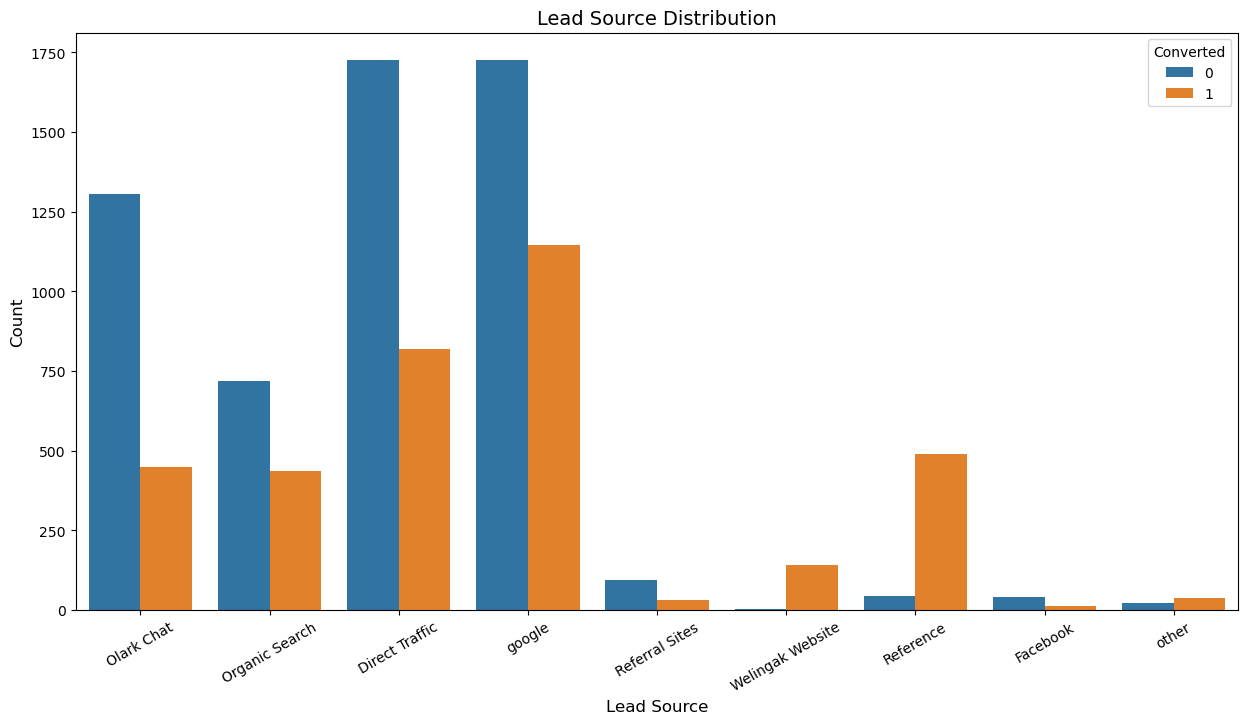

In [15]:
plt.figure(figsize=(15, 7.5))
sns.countplot(x=df['Lead Source'], hue=df['Converted'])
plt.xticks(rotation=30)
plt.xlabel('Lead Source', size=12)
plt.ylabel('Count', size=12)
plt.title('Lead Source Distribution', size=14)
plt.show()

##### interface

*  Google & Direct traffic generates maximum number of the leads.

*   Conversion rate of the welingak website and reference leads is high.

##### To improve the overall lead conversion rate, we should focus on the Organic Search,Olark Chat,Direct Traffic and google leads in the Lead Source and generates more leads. 

### Total Visits

In [16]:
df['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [17]:
df['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2)

count    9103.00
mean        3.45
std         4.85
min         0.00
5%          0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
95%        10.00
99%        17.00
max       251.00
Name: TotalVisits, dtype: float64

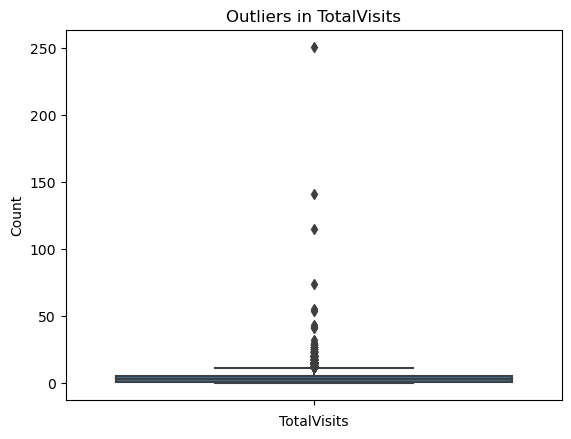

In [18]:
# Check outliers
sns.boxplot(y=df['TotalVisits'])
plt.xlabel('TotalVisits')
plt.ylabel('Count')
plt.title('Outliers in TotalVisits')
plt.show()

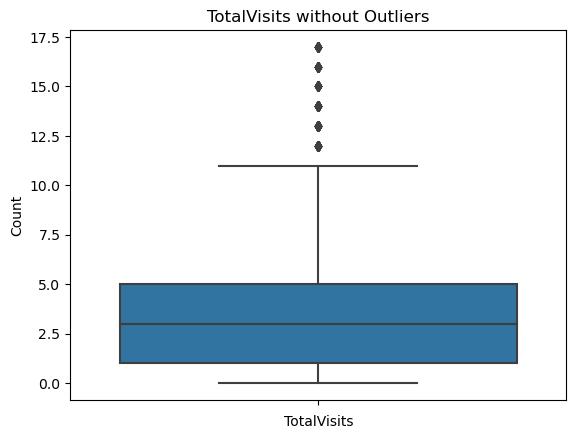

In [19]:
# removing outliers
df = df[df['TotalVisits'] <= df['TotalVisits'].quantile(0.99)]
sns.boxplot(y=df['TotalVisits'])
plt.xlabel('TotalVisits')
plt.ylabel('Count')
plt.title('TotalVisits without Outliers')
plt.show()

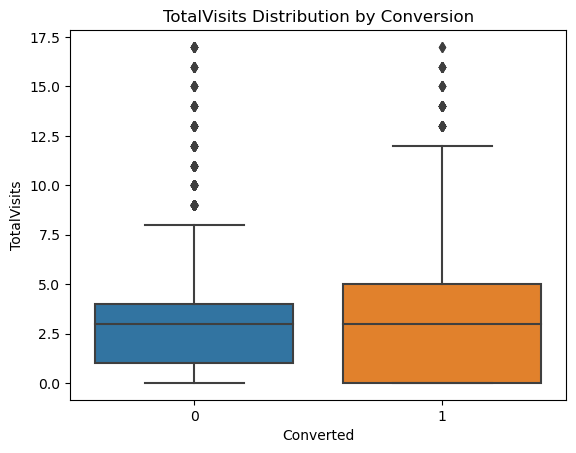

In [20]:
sns.boxplot(y=df['TotalVisits'], x=df['Converted'])
plt.xlabel('Converted')
plt.ylabel('TotalVisits')
plt.title('TotalVisits Distribution by Conversion')
plt.show()

### Median for converted and not converted leads are same.

In [21]:
print("Number of rows:",df.shape[0])
print("Number of Column:",df.shape[1])

Number of rows: 9020
Number of Column: 31


In [22]:
df.Country.value_counts(dropna = False)

India                   6412
NaN                     2324
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
unknown                    4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

### Most values are of 'India' and then comes null values.

In [23]:
df.drop('Country', axis=1, inplace=True)

In [24]:
# similarly for city
df.City.value_counts(dropna = False)

NaN                            3591
Mumbai                         3135
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: City, dtype: int64

In [25]:
#as most of the data contains India and high null values
df.drop('City',axis = 1, inplace = True)

In [26]:
df.drop('How did you hear about X Education',axis = 1, inplace = True)

In [27]:
# Specialization
df.Specialization.value_counts(dropna = False)

NaN                                  3293
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

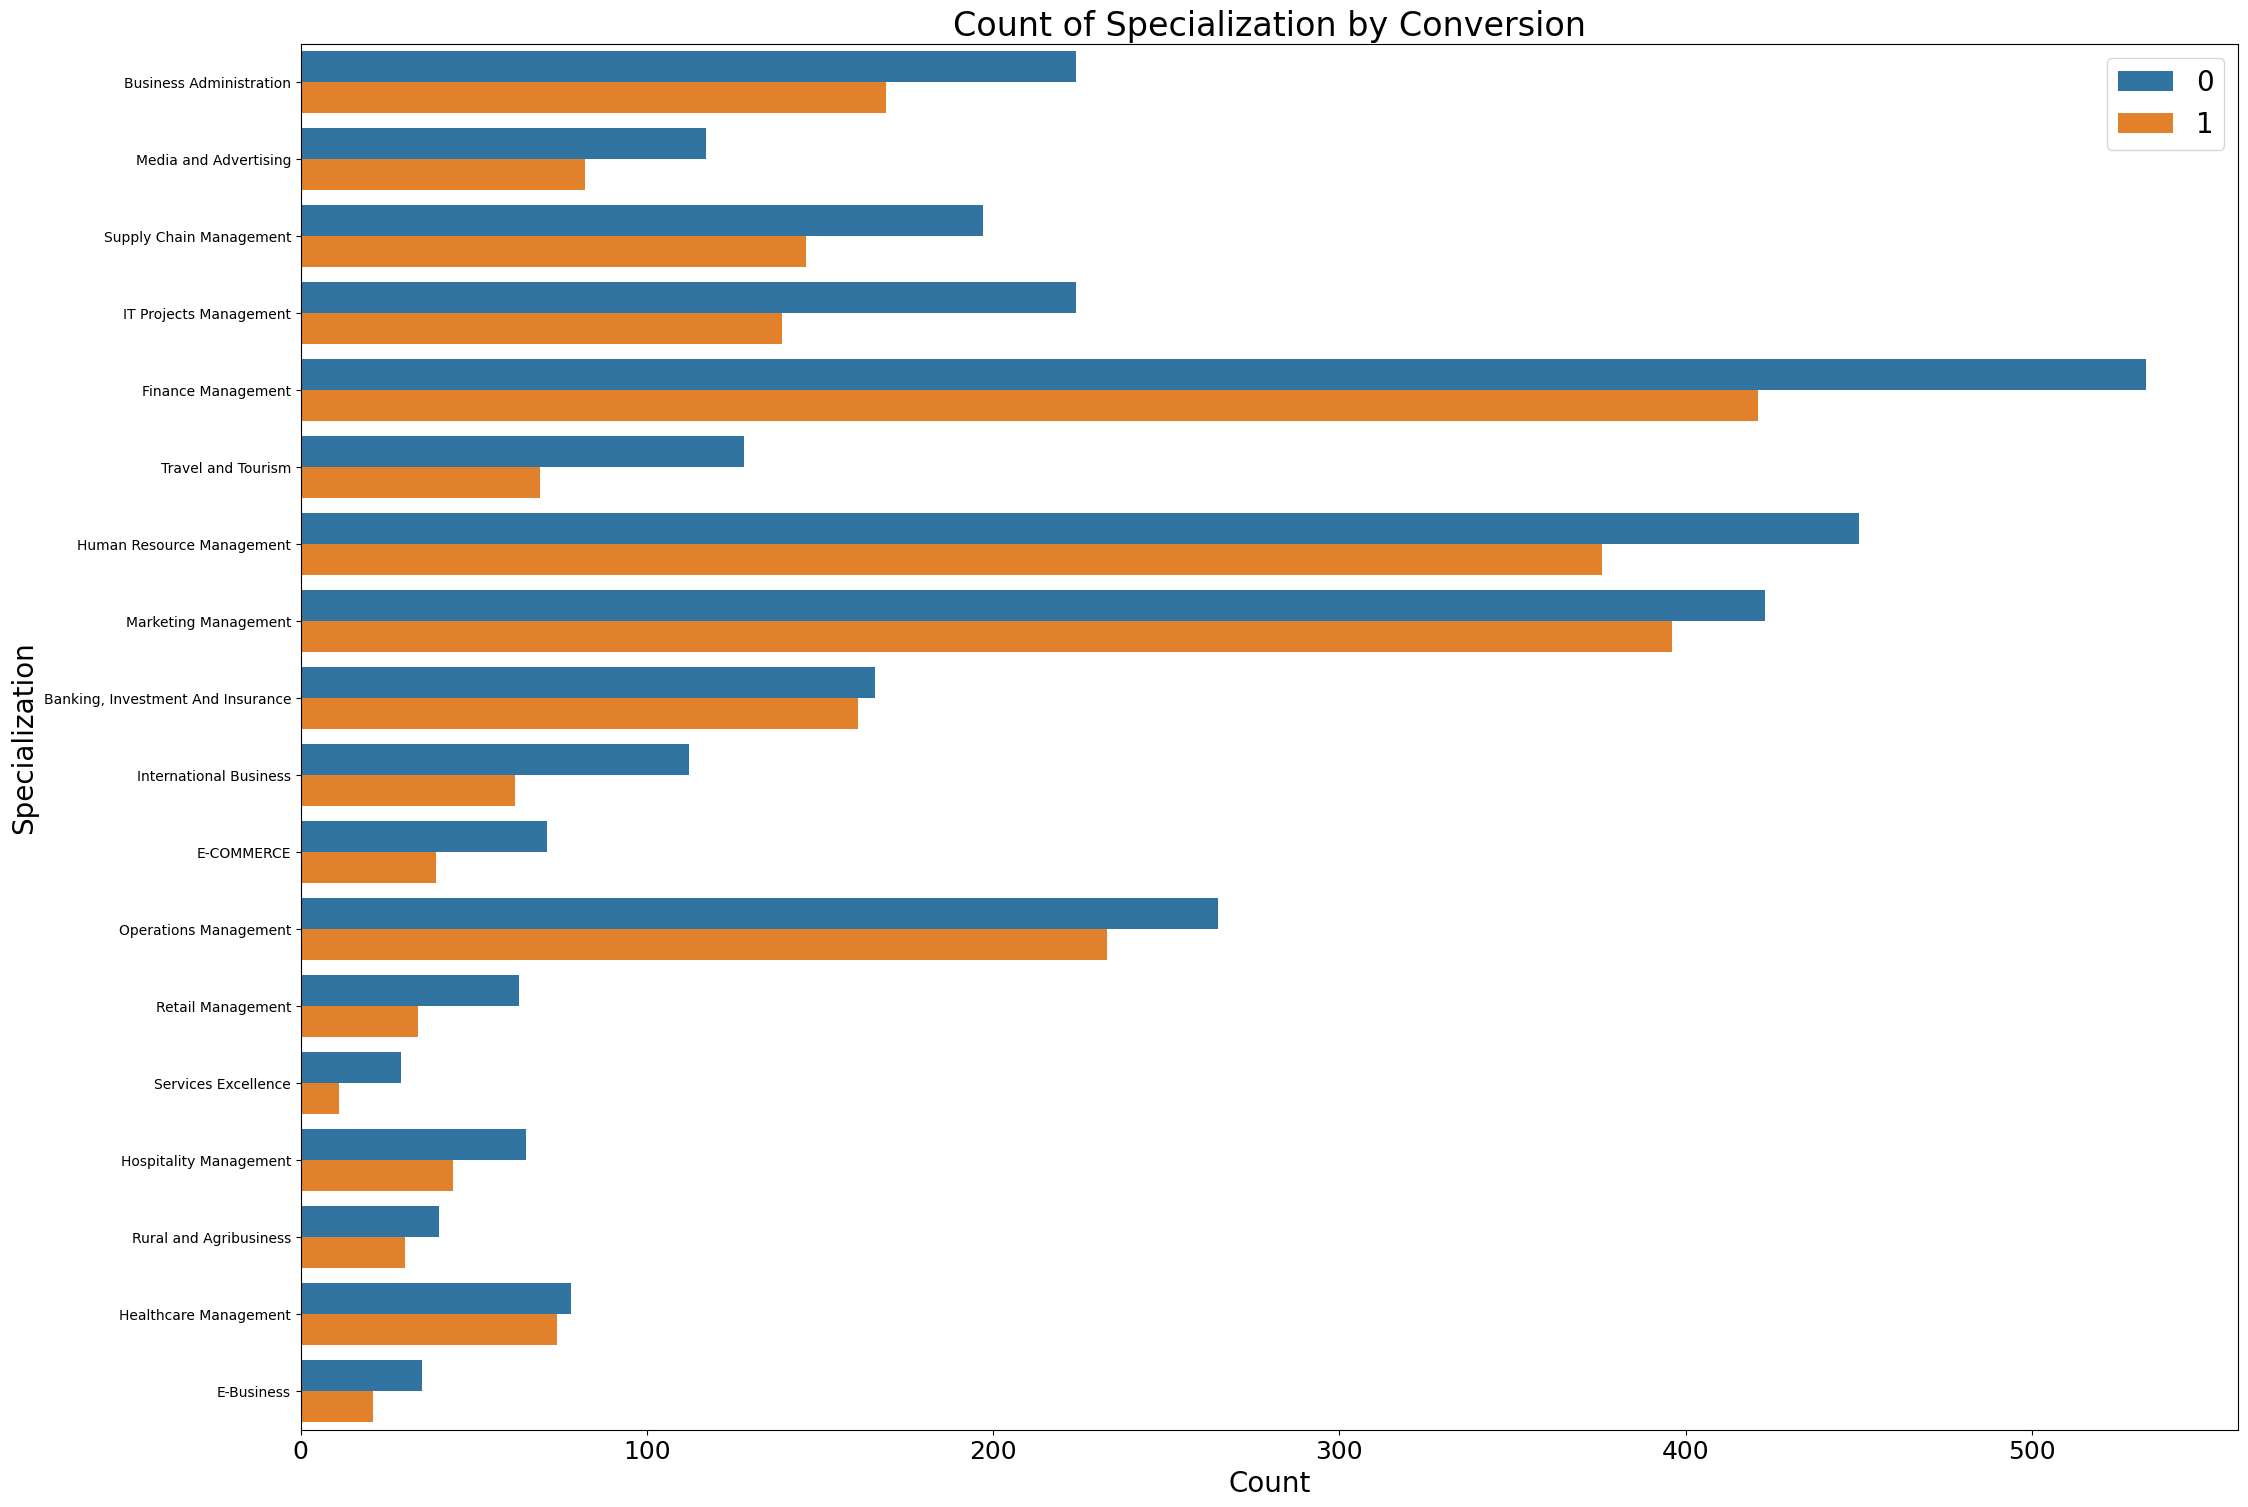

In [28]:
plt.figure(figsize=(25, 18))
ax = sns.countplot(y=df['Specialization'], hue=df['Converted'])
plt.xlabel('Count', size=20)
plt.ylabel('Specialization', size=20)
plt.xticks(fontsize=18)
ax.legend(fontsize=20)
plt.title('Count of Specialization by Conversion', size=24)
plt.show()

In [29]:
# NaN accounts for Specialization that are not mentioned(like Student)
#replacing that with NotSpecified
df.Specialization.replace(np.nan,'NotSpecified',inplace = True)

In [30]:
# What is your current occupation
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5447
NaN                     2665
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

- Unemployed have highest entries 5447.

In [31]:
# What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(dropna = False) 

Better Career Prospects      6335
NaN                          2683
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Most entries are 'Better Career Prospects' 6335

In [32]:
df.drop('What matters most to you in choosing a course',axis = 1,inplace = True)

In [33]:
# Tags
df.Tags.value_counts(dropna = False)

NaN                                                  3308
Will revert after reading the email                  2017
Ringing                                              1173
Interested in other courses                           506
Already a student                                     464
Closed by Horizzon                                    292
switched off                                          239
Busy                                                  185
Lost to EINS                                          171
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [34]:
# Remove all missing values
df.Tags.replace(np.nan,'NotSpecified',inplace = True)

## Peforming EDA

In [35]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the summary statistics of numeric columns
print(df.describe())

# Check the data types of columns
print(df.dtypes)

# Check the number of missing values in each column
print(df.isnull().sum())

# Check unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... Newspaper  \
0                    

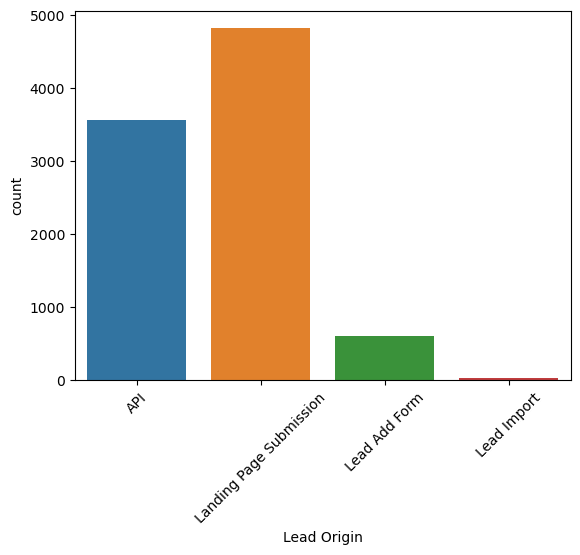

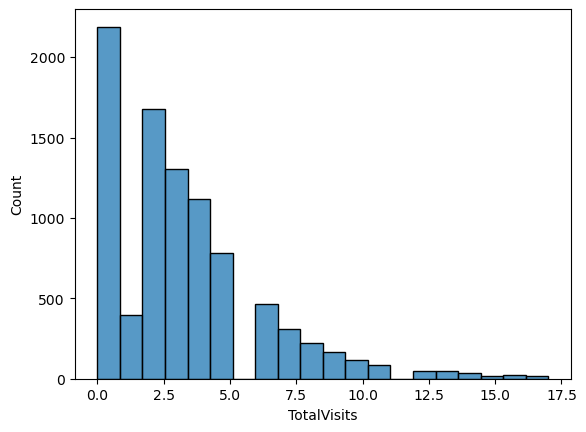

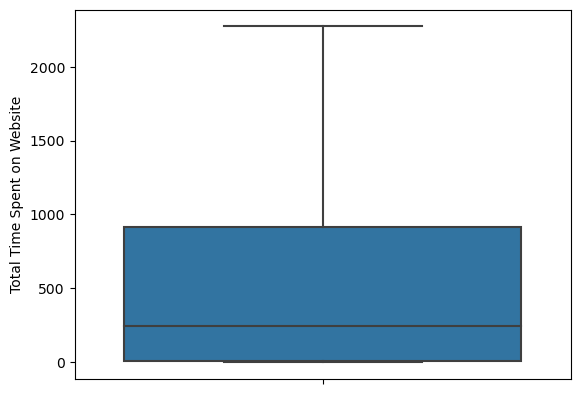

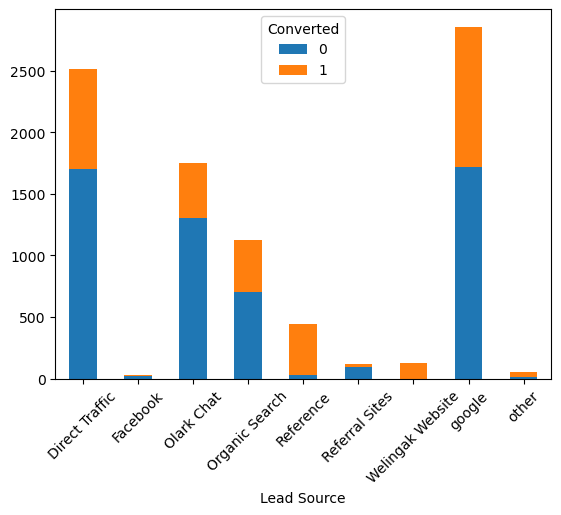

In [36]:
# Countplot for categorical column
sns.countplot(x='Lead Origin', data=df)
plt.xticks(rotation=45)
plt.show()

# Histogram for numeric column
sns.histplot(x='TotalVisits', data=df, bins=20)
plt.show()

# Boxplot for numeric column
sns.boxplot(y='Total Time Spent on Website', data=df)
plt.show()

# Crosstab for two categorical columns
pd.crosstab(df['Lead Source'], df['Converted']).plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.show()

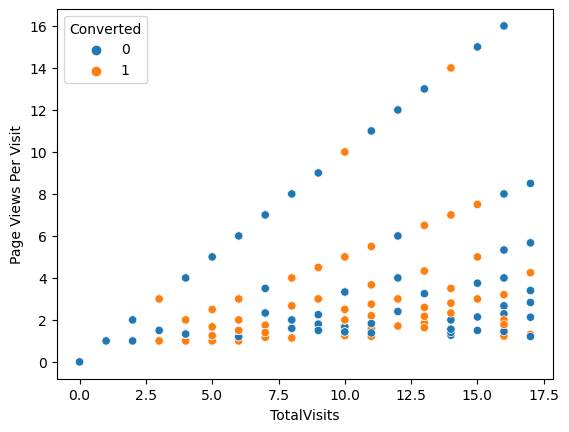

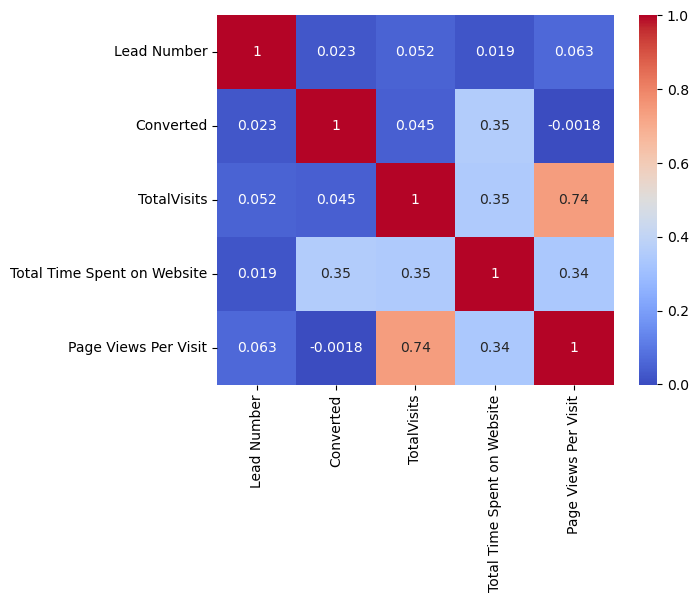

In [37]:
# Scatter plot for two numeric columns
sns.scatterplot(x='TotalVisits', y='Page Views Per Visit', hue='Converted', data=df)
plt.show()

# Correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
df['Page Views Per Visit'].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [39]:
limit = df['Page Views Per Visit'].quantile(0.95)
df = df[df['Page Views Per Visit']<=limit]

In [40]:
df.shape

(8675, 27)

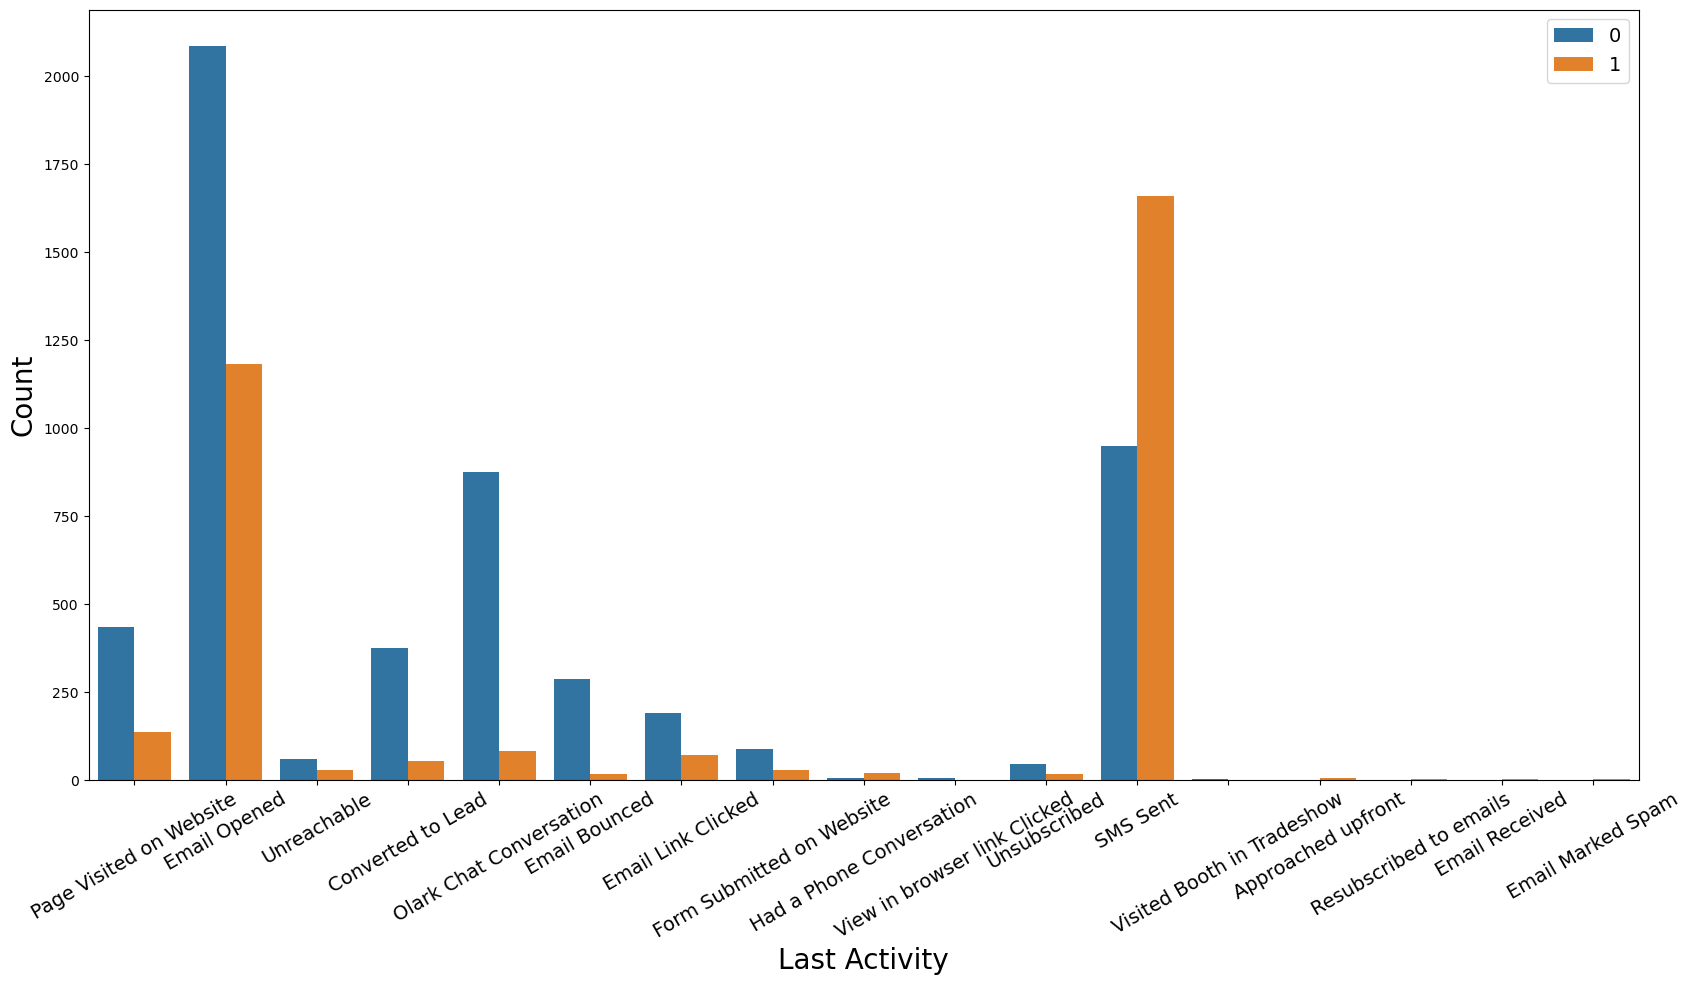

In [41]:
# Last Activity
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=df, x="Last Activity", hue="Converted")
ax.set_xlabel('Last Activity', size=20)
ax.set_ylabel('Count', size=20)
ax.tick_params(axis='x', rotation=30, labelsize=14)
ax.legend(fontsize=14)
plt.show()

In [42]:
df['Last Activity'].replace(['Had a Phone Conversation', 
                             'View in browser link Clicked', 
                            'Visited Booth in Tradeshow', 'Approached upfront',
                            'Resubscribed to emails','Email Received', 
                             'Email Marked Spam'], 'Other_Activity',inplace = True)

- Most of the leads are from email opened.
- SmS sent has the highest conversion rate among all of them.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8675 non-null   object 
 1   Lead Number                               8675 non-null   int64  
 2   Lead Origin                               8675 non-null   object 
 3   Lead Source                               8675 non-null   object 
 4   Do Not Email                              8675 non-null   object 
 5   Do Not Call                               8675 non-null   object 
 6   Converted                                 8675 non-null   int64  
 7   TotalVisits                               8675 non-null   float64
 8   Total Time Spent on Website               8675 non-null   int64  
 9   Page Views Per Visit                      8675 non-null   float64
 10  Last Activity                       

In [44]:
#Specialization
df.Specialization.value_counts()

NotSpecified                         3245
Finance Management                    917
Human Resource Management             788
Marketing Management                  786
Operations Management                 481
Business Administration               374
IT Projects Management                348
Supply Chain Management               323
Banking, Investment And Insurance     301
Media and Advertising                 189
Travel and Tourism                    173
International Business                164
Healthcare Management                 140
Hospitality Management                103
E-COMMERCE                             99
Retail Management                      89
Rural and Agribusiness                 65
E-Business                             52
Services Excellence                    38
Name: Specialization, dtype: int64

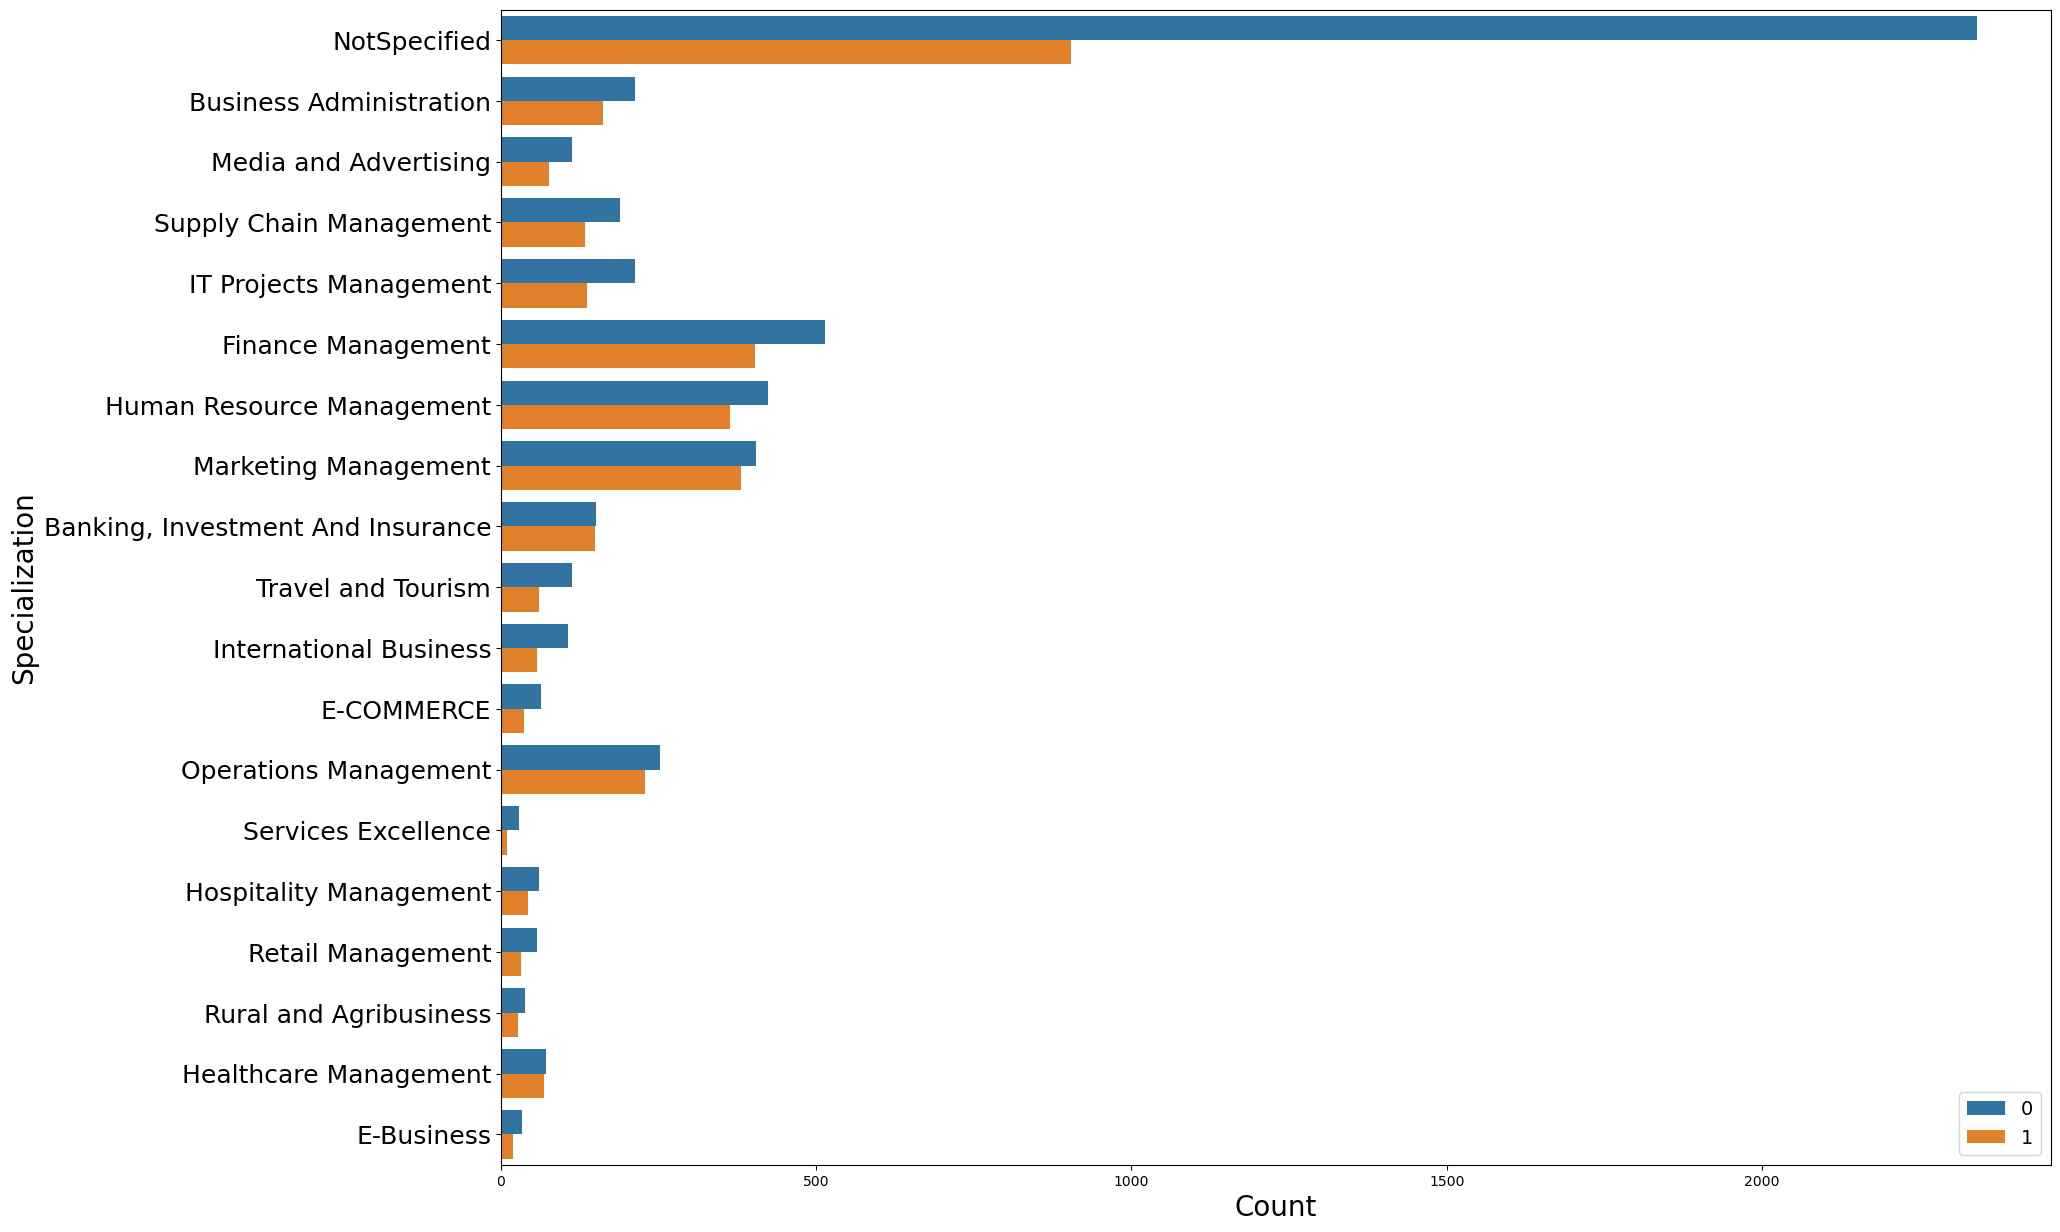

In [45]:
# Specialization
plt.figure(figsize=(20, 15))
ax = sns.countplot(data=df, y="Specialization", hue="Converted")
ax.set_ylabel('Specialization', size=20)
ax.set_xlabel('Count', size=20)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize=14)
plt.show()

In [46]:
df['What is your current occupation'].value_counts()

Unemployed              5221
Working Professional     649
Student                  200
Other                     12
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

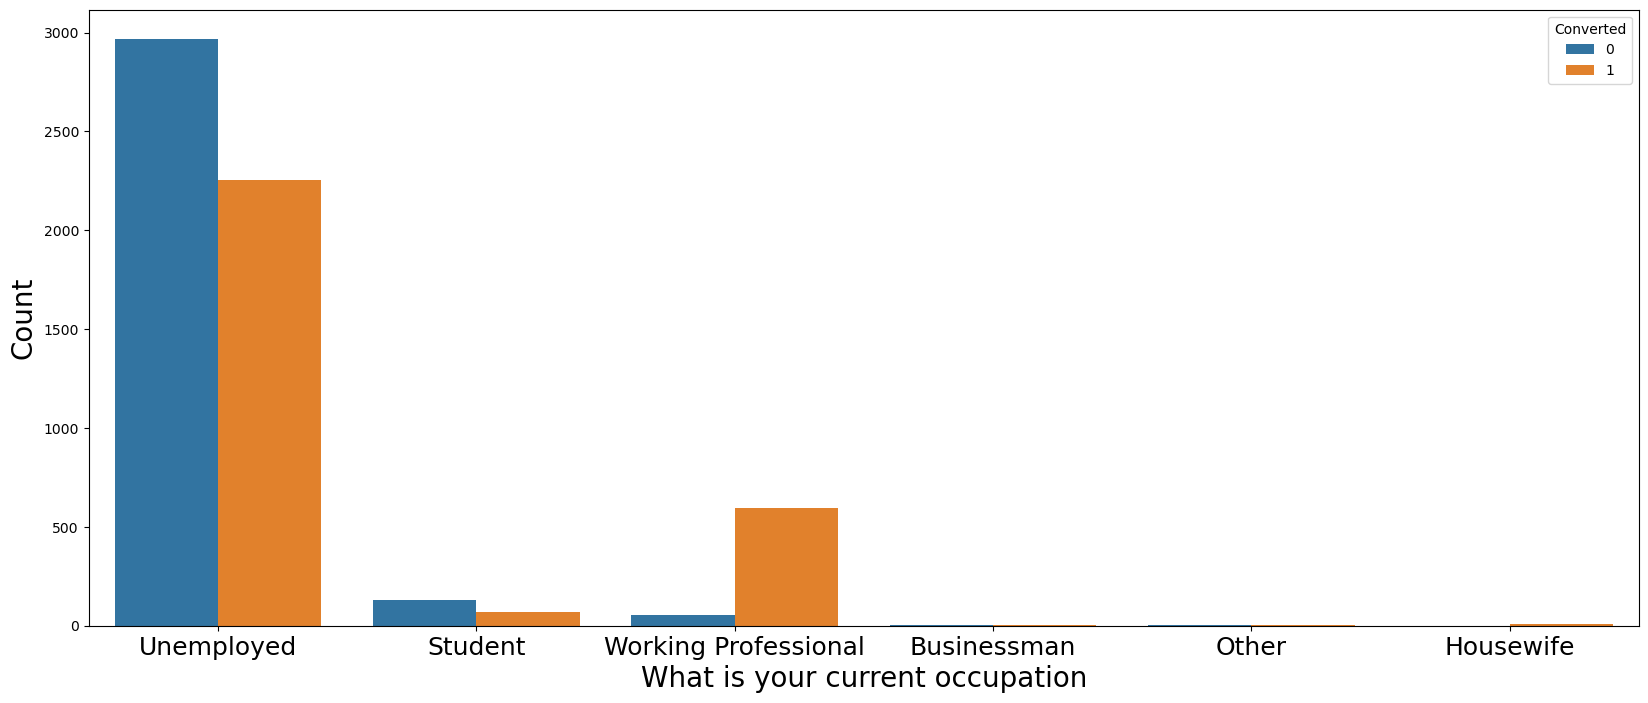

In [47]:
plt.figure(figsize = (20,8))
sns.countplot(x = df['What is your current occupation'], hue = df["Converted"])
plt.xticks(fontsize=18)
plt.xlabel('What is your current occupation', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

-  Working Professionals have high conversion rate as compared to others.
-  Most of the leads are generated by Unemployeds

In [48]:
df.drop('Magazine',axis =1,inplace = True )

In [49]:
df['Newspaper Article'].value_counts()

No    8675
Name: Newspaper Article, dtype: int64

In [50]:
df.drop('Newspaper Article',axis =1,inplace = True )

### X Education Forums

In [51]:
df.drop('X Education Forums',axis =1,inplace = True )
df.drop('Newspaper',axis =1,inplace = True )
df.drop('Search',axis =1,inplace = True )
df.drop('Digital Advertisement',axis =1,inplace = True )
df.drop('Through Recommendations',axis =1,inplace = True )
df.drop('Receive More Updates About Our Courses',axis =1,inplace = True)

In [52]:
df['Tags'].value_counts()

NotSpecified                                         3210
Will revert after reading the email                  1929
Ringing                                              1112
Interested in other courses                           488
Already a student                                     454
Closed by Horizzon                                    284
switched off                                          229
Busy                                                  174
Lost to EINS                                          167
Not doing further education                           134
Interested  in full time MBA                          110
Graduation in progress                                105
invalid number                                         73
Diploma holder (Not Eligible)                          62
wrong number given                                     42
opp hangup                                             30
number not provided                                    25
in touch with 

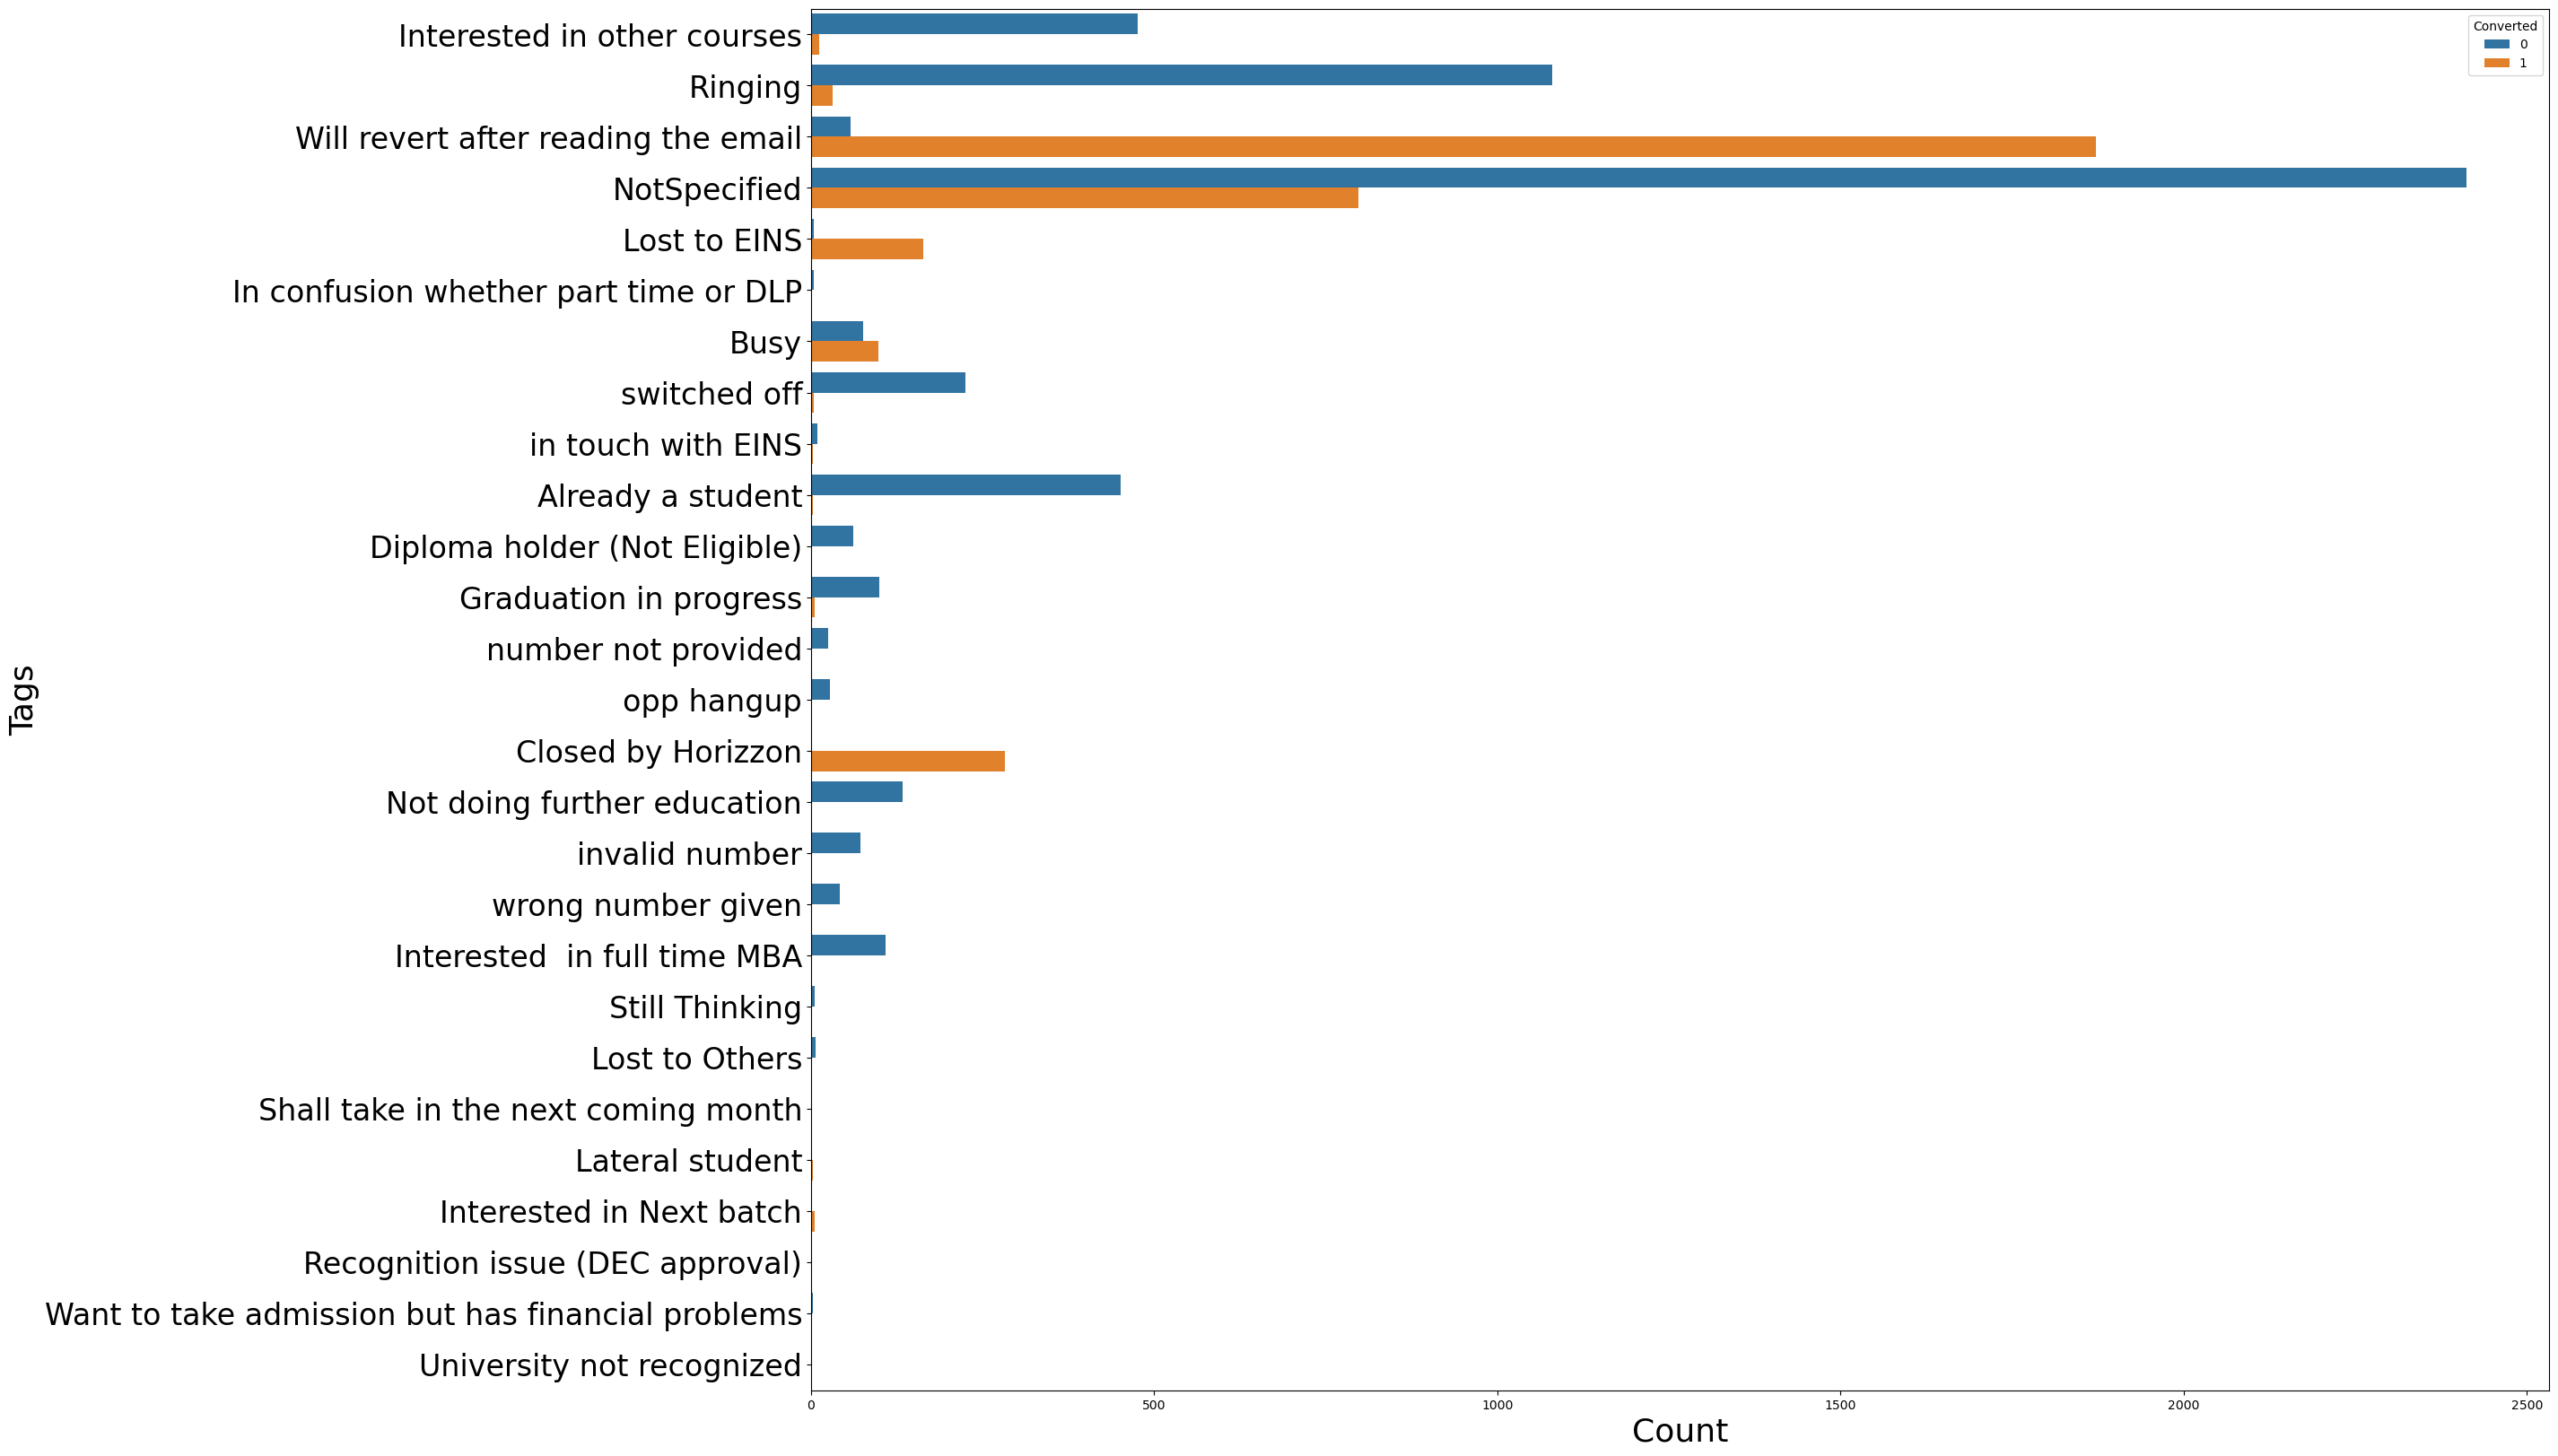

In [53]:
# Tags
plt.figure(figsize=(25, 20))
ax = sns.countplot(data=df, y='Tags', hue='Converted')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=24)
ax.set_xlabel('Count', size=26)
ax.set_ylabel('Tags', size=26)
plt.show()

In [54]:
df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                    'Diploma holder (Not Eligible)',
                    'Approached upfront','Graduation in progress','number not provided',
                    'opp hangup','Still Thinking',
                    'Lost to Others','Shall take in the next coming month','Lateral student',
                    'Interested in Next batch',
                    'Recognition issue (DEC approval)',
                    'Want to take admission but has financial problems',
                    'University not recognized'], 'Other',inplace = True)

In [55]:
# Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8675 non-null   object 
 1   Lead Number                               8675 non-null   int64  
 2   Lead Origin                               8675 non-null   object 
 3   Lead Source                               8675 non-null   object 
 4   Do Not Email                              8675 non-null   object 
 5   Do Not Call                               8675 non-null   object 
 6   Converted                                 8675 non-null   int64  
 7   TotalVisits                               8675 non-null   float64
 8   Total Time Spent on Website               8675 non-null   int64  
 9   Page Views Per Visit                      8675 non-null   float64
 10  Last Activity                       

- Drop the unnecessaries

In [56]:
df.drop('Update me on Supply Chain Content',axis = 1,inplace = True)
df.drop('Get updates on DM Content',axis = 1,inplace = True)
df.drop('I agree to pay the amount through cheque',axis = 1,inplace = True)
df.drop('A free copy of Mastering The Interview',axis = 1,inplace = True)
df.drop('Last Notable Activity',axis = 1,inplace = True)

C:\Users\VCSPI0048\AppData\Local\Temp\ipykernel_23052\1212826092.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="plasma", annot=True, fmt=".2f")


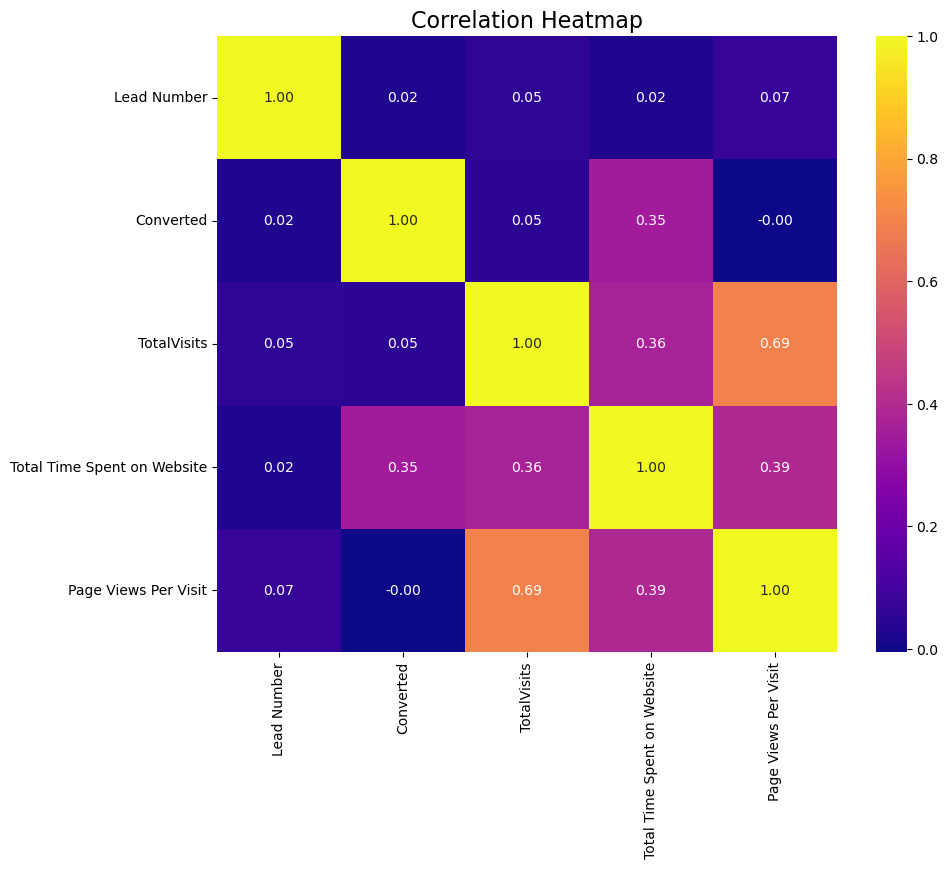

In [57]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="plasma", annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Encoding and Scaling

In [58]:
# Creating Dummies
#converting some binary variables to 1/0
df['Do Not Email']=df['Do Not Email'].map({'Yes': 1, "No": 0})

In [59]:
# Creating dummy variables for categorical columns and dropping the first one
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags']
Temp = pd.get_dummies(df[categorical_columns], drop_first=True)
Temp.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Olark Chat  \
0                        0                     0                       1   
1                        0                     0                       0   
2                        0                     0                       0   
3                        0                     0                       0   
4                        0                     0                       0   

   Lead Source_Organic Search  Lead Source_Reference  \
0                           0                      0   
1                           1                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Lead Source_google  ...  Tags_Interested in other courses  \
0                   0  ...                                 1   
1                   0  ...                                 0   
2                   0  ...                                 0   
3                   0  ...                                 0   
4                   1  ...                                 0   

   Tags_Lost to EINS  Tags_Not doing further education  Tags_NotSpecified  \
0                  0                                 0                  0   
1                  0                                 0                  0   
2                  0                                 0                  0   
3                  0                                 0                  0   
4                  0                                 0                  0   

   Tags_Other  Tags_Ringing  Tags_Will revert after reading the email  \
0           0             0                                         0   
1           0             1                                         0   
2           0             0                                         1   
3           0             1                                         0   
4           0             0                                         1   

   Tags_invalid number  Tags_switched off  Tags_wrong number given  
0                    0                  0                        0  
1                    0                  0                        0  
2                    0                  0                        0  
3                    0                  0                        0  
4                    0                  0                        0  

[5 rows x 57 columns]

In [60]:
# Adding the results to the master dataframe
data = pd.concat([df, Temp], axis=1)
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0          No          0          0.0   
1  Organic Search             0          No          0          5.0   
2  Direct Traffic             0          No          1          2.0   
3  Direct Traffic             0          No          0          1.0   
4          google             0          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Tags_Interested in other courses Tags_Lost to EINS  \
0                                1                 0   
1                                0                 0   
2                                0                 0   
3                                0                 0   
4                                0                 0   

  Tags_Not doing further education Tags_NotSpecified  Tags_Other  \
0                                0                 0           0   
1                                0                 0           0   
2                                0                 0           0   
3                                0                 0           0   
4                                0                 0           0   

   Tags_Ringing  Tags_Will revert after reading the email  \
0             0                                         0   
1             1                                         0   
2             0                                         1   
3             1                                         0   
4             0                                         1   

   Tags_invalid number  Tags_switched off  Tags_wrong number given  
0                    0                  0                        0  
1                    0                  0                        0  
2                    0                  0                        0  
3                    0                  0                        0  
4                    0                  0                        0  

[5 rows x 71 columns]

In [61]:
data.drop(['Lead Origin','Do Not Call','Do Not Email', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags'], axis = 1,inplace = True)

In [62]:
data.head()

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  ...  \
0                        0                     0  ...   
1                        0                     0  ...   
2                        0                     0  ...   
3                        0                     0  ...   
4                        0                     0  ...   

   Tags_Interested in other courses  Tags_Lost to EINS  \
0                                 1                  0   
1                                 0                  0   
2                                 0                  0   
3                                 0                  0   
4                                 0                  0   

   Tags_Not doing further education  Tags_NotSpecified  Tags_Other  \
0                                 0                  0           0   
1                                 0                  0           0   
2                                 0                  0           0   
3                                 0                  0           0   
4                                 0                  0           0   

   Tags_Ringing  Tags_Will revert after reading the email  \
0             0                                         0   
1             1                                         0   
2             0                                         1   
3             1                                         0   
4             0                                         1   

   Tags_invalid number  Tags_switched off  Tags_wrong number given  
0                    0                  0                        0  
1                    0                  0                        0  
2                    0                  0                        0  
3                    0                  0                        0  
4                    0                  0                        0  

[5 rows x 63 columns]

C:\Users\VCSPI0048\AppData\Local\Temp\ipykernel_23052\2186611323.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="plasma", annot=True)


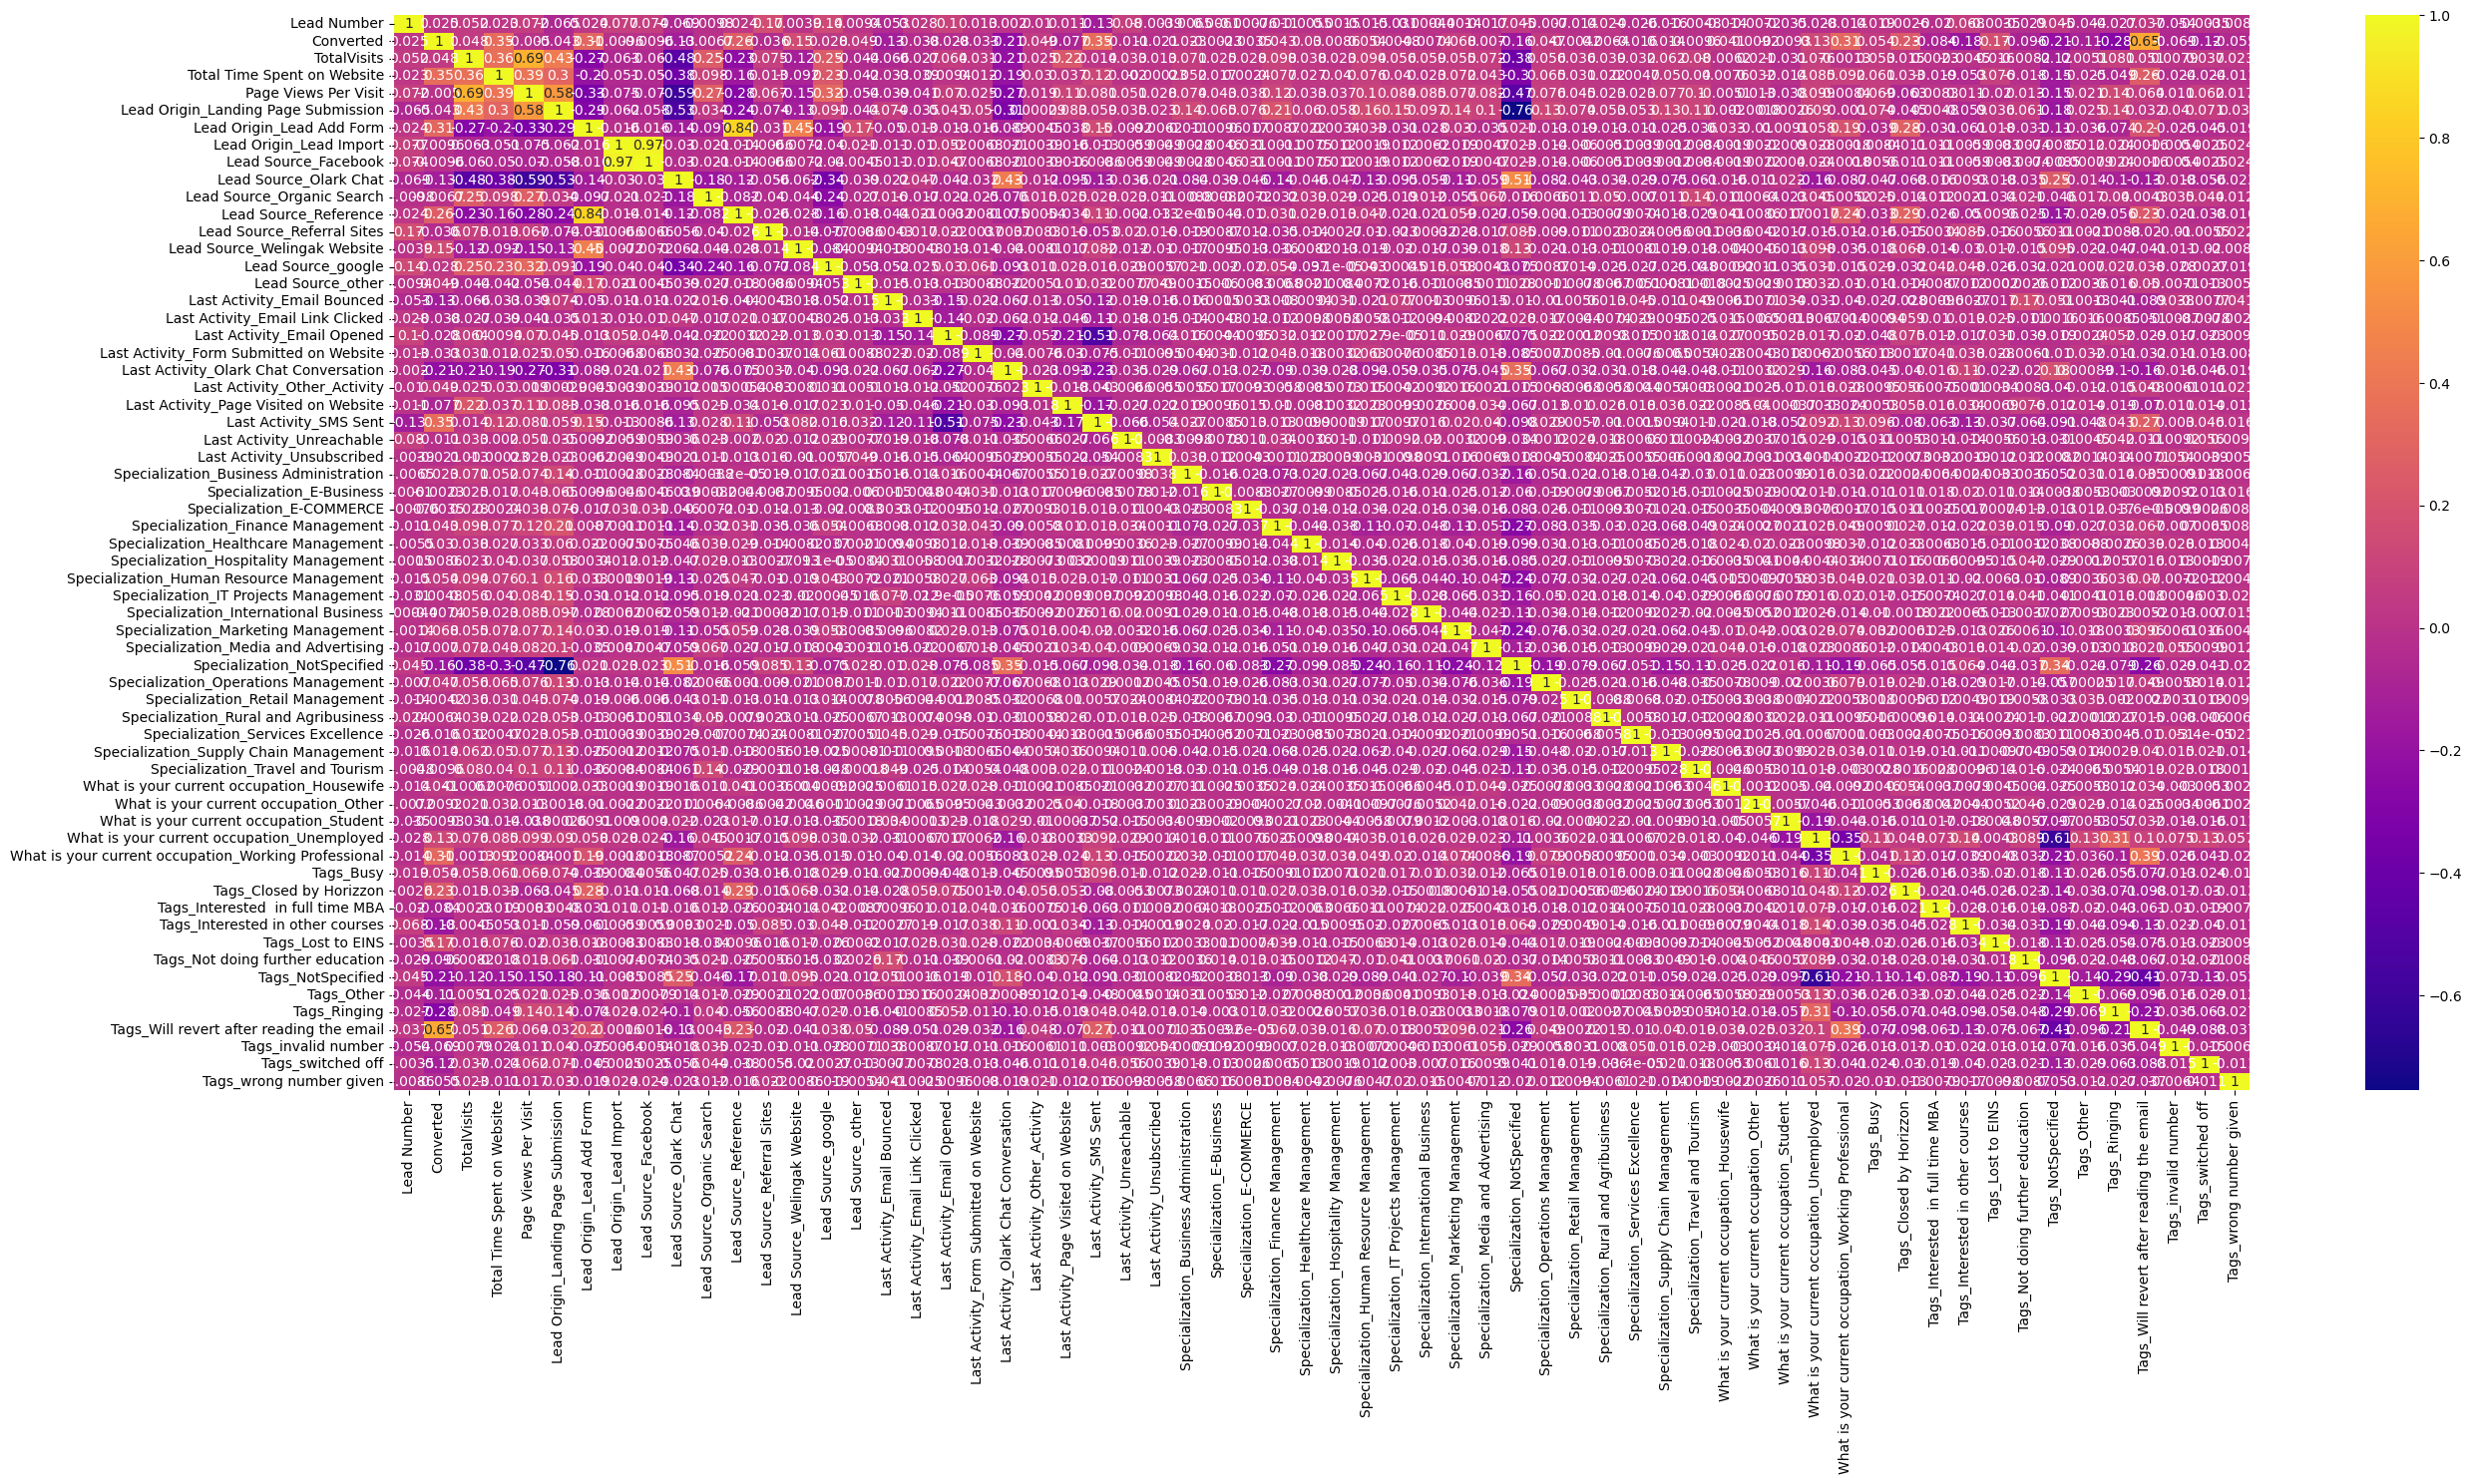

In [63]:
#Heatmap1
plt.figure(figsize=(30,14))
sns.heatmap(data.corr(), cmap="plasma", annot=True)
plt.show()

##### Let restrecture Correlation Map

C:\Users\VCSPI0048\AppData\Local\Temp\ipykernel_23052\106533291.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


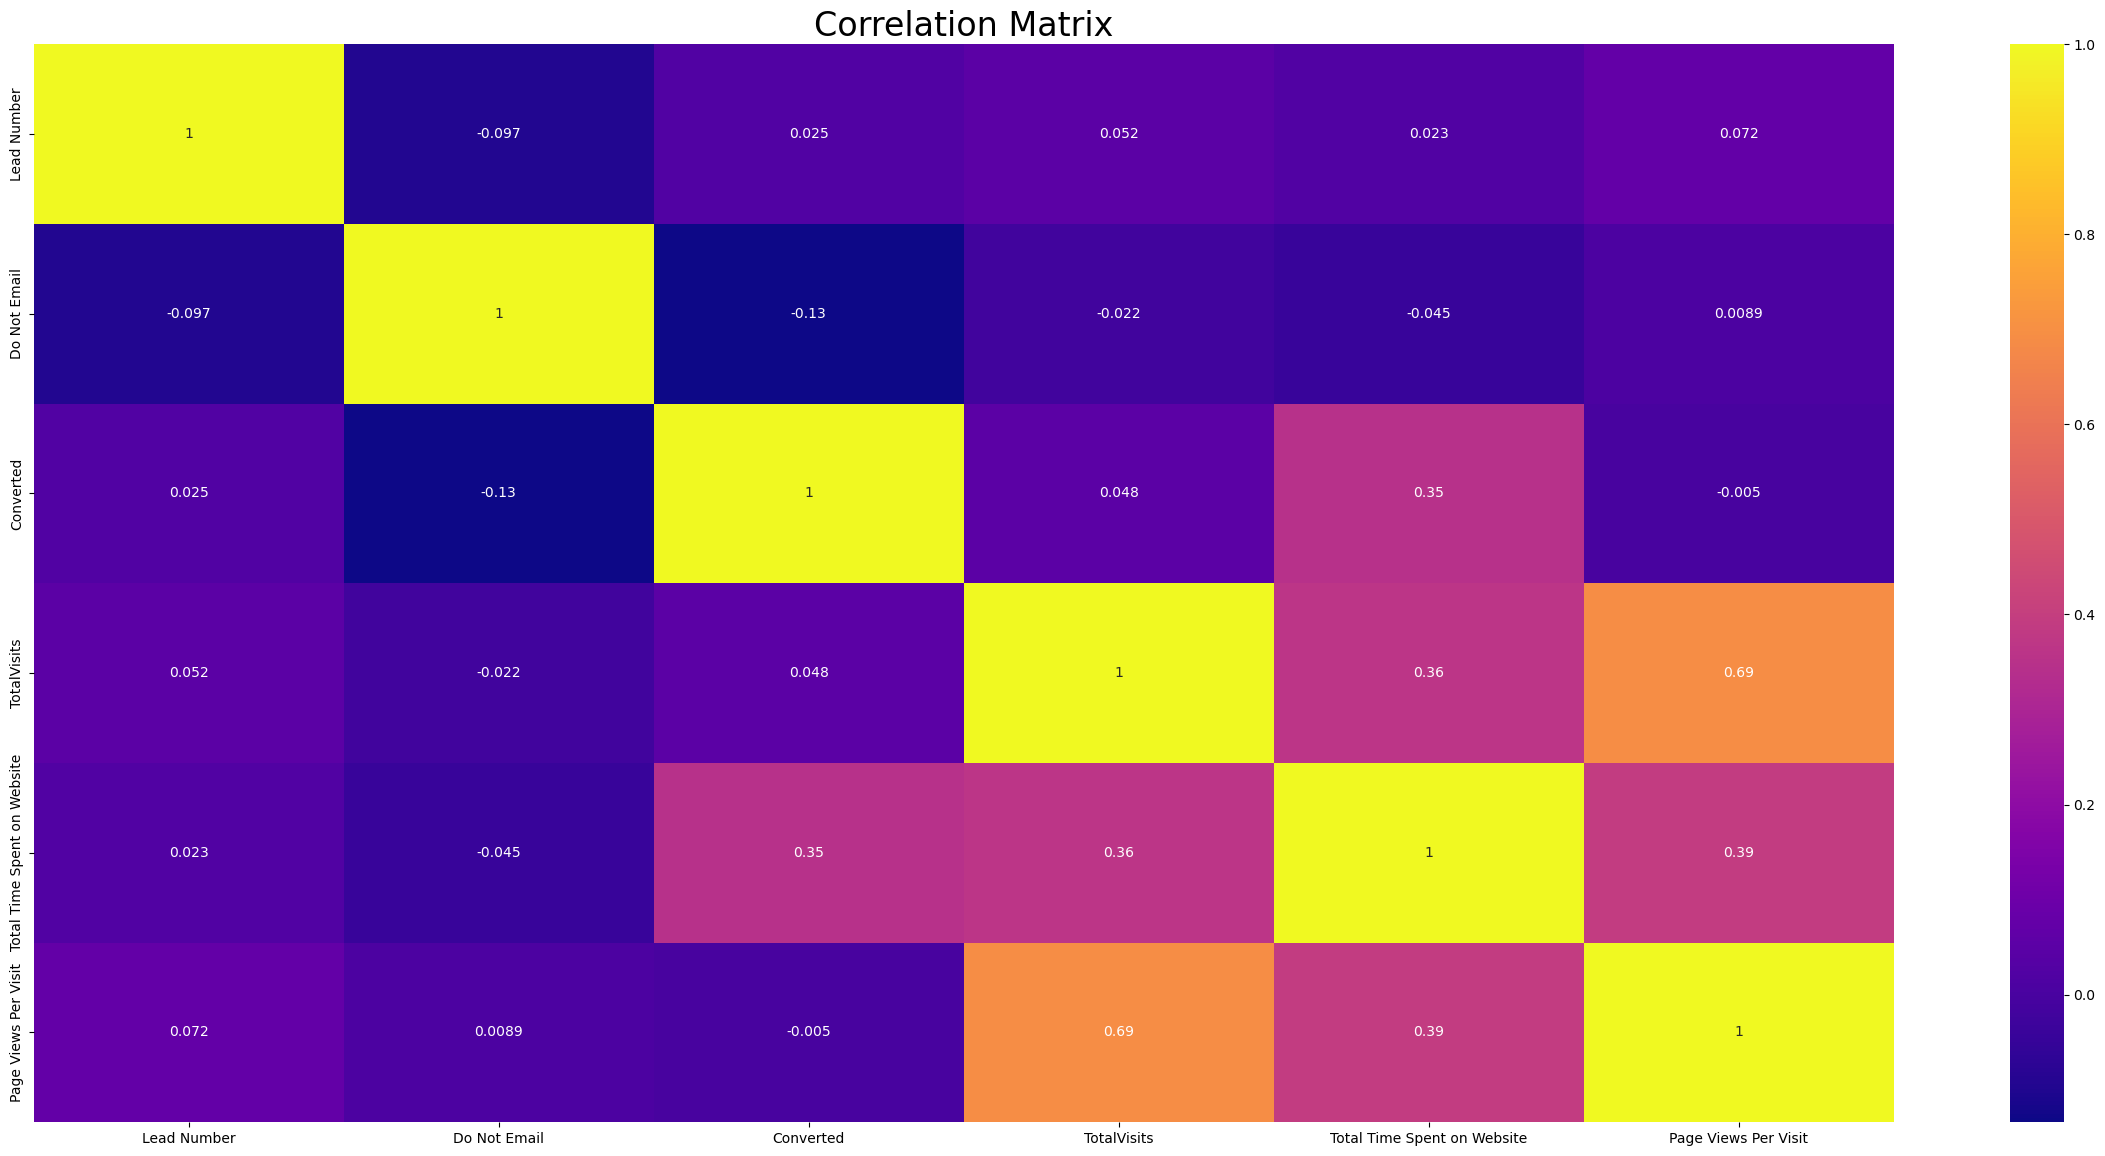

In [64]:
# Heatmap
plt.figure(figsize=(30, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="plasma", annot=True)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

### Since this heatmap is very crowded and the correlations are not perfectly visible so we refer to RFE.

In [65]:
#Putting response variable to y
y = data.pop('Converted')
X = data.copy()

In [66]:
# as "Prospect ID", "Lead Number" are just indicative of unique IDs they can be dropped
X.drop("Prospect ID",axis =1, inplace = True)
X.drop("Lead Number",axis =1, inplace = True)

In [67]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6072, 60)
X_test shape: (2603, 60)
y_train shape: (6072,)
y_test shape: (2603,)


### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [69]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

## Model building
### Running Our First Training Model
####  Model 1

In [71]:
import statsmodels.api as sm

# Fit the GLM model
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1_results = logm1.fit()

# Print the model summary
print(logm1_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1042.7
Date:                Mon, 22 May 2023   Deviance:                       2085.3
Time:                        13:52:19   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6255
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Feature Selection Using RFE
#### Model Predictions

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize Logistic Regression model
LR = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE) with the desired number of features
rfe = RFE(estimator=LR, n_features_to_select=15)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

#runnung RFE with 15 variables

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 31),
 ('Lead Source_other', False, 24),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other_Activity', False, 16),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 15),
 ('L

In [77]:
l = X_train.columns[rfe.support_]
l

## Model 2

In [79]:
X_train = sm.add_constant(X_train[l])
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()
logit_result.summary()

         Current function value: 0.207628
         Iterations: 35


C:\Users\VCSPI0048\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                          Logit   Df Residuals:                     6056
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6867
Time:                        13:54:48   Log-Likelihood:                -1260.7
converged:                      False   LL-Null:                       -4024.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7601      0.262    -25.799      0.000      -7.274      -6.246
Lead Source_Welingak Website                             2.4443      0.736      3.319      0.001       1.001       3.888
Last Activity_Email Bounced                             -2.1440      0.472     -4.547      0.000      -3.068      -1.220
Last Activity_SMS Sent                                   2.2055      0.118     18.653      0.000       1.974       2.437
What is your current occupation_Student                  2.2375      0.518      4.318      0.000       1.222       3.253
What is your current occupation_Unemployed               2.7314      0.137     19.989      0.000       2.464       2.999
What is your current occupation_Working Professional     2.9216      0.373      7.829      0.000       2.190       3.653
Tags_Busy                                                3.1128      0.298     10.432      0.000       2.528       3.698
Tags_Closed by Horizzon                                  8.7304      0.758     11.522      0.000       7.245      10.216
Tags_Lost to EINS                                        9.1758      0.667     13.765      0.000       7.869      10.482
Tags_Not doing further education                       -17.1853   3465.553     -0.005      0.996   -6809.544    6775.174
Tags_NotSpecified                                        4.1521      0.239     17.363      0.000       3.683       4.621
Tags_Ringing                                            -0.9699      0.317     -3.059      0.002      -1.591      -0.349
Tags_Will revert after reading the email                 6.9922      0.278     25.131      0.000       6.447       7.538
Tags_invalid number                                    -19.9590   1.24e+04     -0.002      0.999   -2.44e+04    2.43e+04
Tags_switched off                                       -1.3151      0.628     -2.095      0.036      -2.546      -0.085
========================================================================================================================
"""

In [80]:
X_train.drop('Tags_invalid number',axis = 1,inplace = True)

## Model 3

In [81]:
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()
logit_result.summary()

         Current function value: 0.208068
         Iterations: 35


C:\Users\VCSPI0048\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                          Logit   Df Residuals:                     6057
Method:                           MLE   Df Model:                           14
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6861
Time:                        13:56:04   Log-Likelihood:                -1263.4
converged:                      False   LL-Null:                       -4024.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.8621      0.263    -26.074      0.000      -7.378      -6.346
Lead Source_Welingak Website                             2.4455      0.736      3.321      0.001       1.002       3.889
Last Activity_Email Bounced                             -2.1485      0.471     -4.559      0.000      -3.072      -1.225
Last Activity_SMS Sent                                   2.1904      0.118     18.587      0.000       1.959       2.421
What is your current occupation_Student                  2.2552      0.523      4.310      0.000       1.230       3.281
What is your current occupation_Unemployed               2.7261      0.136     19.987      0.000       2.459       2.993
What is your current occupation_Working Professional     2.9281      0.375      7.810      0.000       2.193       3.663
Tags_Busy                                                3.2282      0.298     10.850      0.000       2.645       3.811
Tags_Closed by Horizzon                                  8.8341      0.758     11.654      0.000       7.348      10.320
Tags_Lost to EINS                                        9.2790      0.667     13.911      0.000       7.972      10.586
Tags_Not doing further education                       -13.9903    743.044     -0.019      0.985   -1470.329    1442.349
Tags_NotSpecified                                        4.2615      0.239     17.804      0.000       3.792       4.731
Tags_Ringing                                            -0.8502      0.316     -2.692      0.007      -1.469      -0.231
Tags_Will revert after reading the email                 7.0977      0.279     25.452      0.000       6.551       7.644
Tags_switched off                                       -1.1949      0.627     -1.905      0.057      -2.424       0.034
========================================================================================================================
"""

In [82]:
X_train.drop('Tags_Not doing further education',axis = 1,inplace = True)

## Model 4

In [83]:
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.208396
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                          Logit   Df Residuals:                     6058
Method:                           MLE   Df Model:                           13
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6856
Time:                        13:56:57   Log-Likelihood:                -1265.4
converged:                       True   LL-Null:                       -4024.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9465      0.263    -26.417      0.000      -7.462      -6.431
Lead Source_Welingak Website                             2.4457      0.736      3.322      0.001       1.003       3.889
Last Activity_Email Bounced                             -2.1586      0.470     -4.593      0.000      -3.080      -1.237
Last Activity_SMS Sent                                   2.1885      0.118     18.581      0.000       1.958       2.419
What is your current occupation_Student                  2.2708      0.527      4.307      0.000       1.238       3.304
What is your current occupation_Unemployed               2.7253      0.136     19.985      0.000       2.458       2.993
What is your current occupation_Working Professional     2.9333      0.376      7.805      0.000       2.197       3.670
Tags_Busy                                                3.3144      0.297     11.158      0.000       2.732       3.897
Tags_Closed by Horizzon                                  8.9182      0.758     11.766      0.000       7.433      10.404
Tags_Lost to EINS                                        9.3644      0.667     14.039      0.000       8.057      10.672
Tags_NotSpecified                                        4.3469      0.239     18.193      0.000       3.879       4.815
Tags_Ringing                                            -0.7634      0.315     -2.421      0.015      -1.381      -0.145
Tags_Will revert after reading the email                 7.1816      0.279     25.768      0.000       6.635       7.728
Tags_switched off                                       -1.1081      0.627     -1.768      0.077      -2.337       0.121
========================================================================================================================
"""

In [84]:
X_train.drop('Tags_switched off',axis = 1,inplace = True)

## Model 5

In [85]:
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.208726
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                          Logit   Df Residuals:                     6059
Method:                           MLE   Df Model:                           12
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6851
Time:                        13:57:45   Log-Likelihood:                -1267.4
converged:                       True   LL-Null:                       -4024.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1249      0.257    -27.710      0.000      -7.629      -6.621
Lead Source_Welingak Website                             2.4477      0.736      3.325      0.001       1.005       3.890
Last Activity_Email Bounced                             -2.1619      0.470     -4.599      0.000      -3.083      -1.241
Last Activity_SMS Sent                                   2.1659      0.117     18.493      0.000       1.936       2.395
What is your current occupation_Student                  2.2962      0.535      4.293      0.000       1.248       3.345
What is your current occupation_Unemployed               2.7174      0.136     19.982      0.000       2.451       2.984
What is your current occupation_Working Professional     2.9429      0.379      7.774      0.000       2.201       3.685
Tags_Busy                                                3.5130      0.288     12.218      0.000       2.949       4.077
Tags_Closed by Horizzon                                  9.0989      0.756     12.039      0.000       7.618      10.580
Tags_Lost to EINS                                        9.5444      0.665     14.361      0.000       8.242      10.847
Tags_NotSpecified                                        4.5363      0.230     19.732      0.000       4.086       4.987
Tags_Ringing                                            -0.5586      0.305     -1.829      0.067      -1.157       0.040
Tags_Will revert after reading the email                 7.3653      0.272     27.065      0.000       6.832       7.899
========================================================================================================================
"""

### Getting predicted values on the train set

In [88]:
y_train_pred = logit_result.predict(X_train)
y_train_pred = y_train_pred.values.reshape(-1)

- dataframe with id, predicted probablity, predicted conversion nd conversion

In [89]:
data.head()

Prospect ID  Lead Number  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Olark Chat  ...  \
0                        0                     0                       1  ...   
1                        0                     0                       0  ...   
2                        0                     0                       0  ...   
3                        0                     0                       0  ...   
4                        0                     0                       0  ...   

   Tags_Interested in other courses  Tags_Lost to EINS  \
0                                 1                  0   
1                                 0                  0   
2                                 0                  0   
3                                 0                  0   
4                                 0                  0   

   Tags_Not doing further education  Tags_NotSpecified  Tags_Other  \
0                                 0                  0           0   
1                                 0                  0           0   
2                                 0                  0           0   
3                                 0                  0           0   
4                                 0                  0           0   

   Tags_Ringing  Tags_Will revert after reading the email  \
0             0                                         0   
1             1                                         0   
2             0                                         1   
3             1                                         0   
4             0                                         1   

   Tags_invalid number  Tags_switched off  Tags_wrong number given  
0                    0                  0                        0  
1                    0                  0                        0  
2                    0                  0                        0  
3                    0                  0                        0  
4                    0                  0                        0  

[5 rows x 62 columns]

In [91]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = df['Prospect ID']
y_train_pred_final.head()

Converted  Converted_prob                           Prospect ID
0          0        0.012038  7927b2df-8bba-4d29-b9a2-b6e0beafe620
1          1        0.950629  2a272436-5132-4136-86fa-dcc88c88f482
2          0        0.012038  8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3          0        0.006922  0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4          1        0.995271  3256f628-e534-4826-9d63-4a8b88782852

- Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
#  the head of the set
y_train_pred_final.head()

Converted  Converted_prob                           Prospect ID  predicted
0          0        0.012038  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0
1          1        0.950629  2a272436-5132-4136-86fa-dcc88c88f482          1
2          0        0.012038  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0
3          0        0.006922  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0
4          1        0.995271  3256f628-e534-4826-9d63-4a8b88782852          1

## Model Evaluation

In [97]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3578  202]
 [ 296 1996]]


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9179841897233202


## VIF

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features    VIF
0                                               const  18.39
10                                  Tags_NotSpecified   3.79
5          What is your current occupation_Unemployed   3.38
6   What is your current occupation_Working Profes...   2.05
12           Tags_Will revert after reading the email   1.92
11                                       Tags_Ringing   1.48
4             What is your current occupation_Student   1.27
3                              Last Activity_SMS Sent   1.16
8                             Tags_Closed by Horizzon   1.16
1                        Lead Source_Welingak Website   1.11
7                                           Tags_Busy   1.11
9                                   Tags_Lost to EINS   1.10
2                         Last Activity_Email Bounced   1.03

## Plotting the ROC Curve

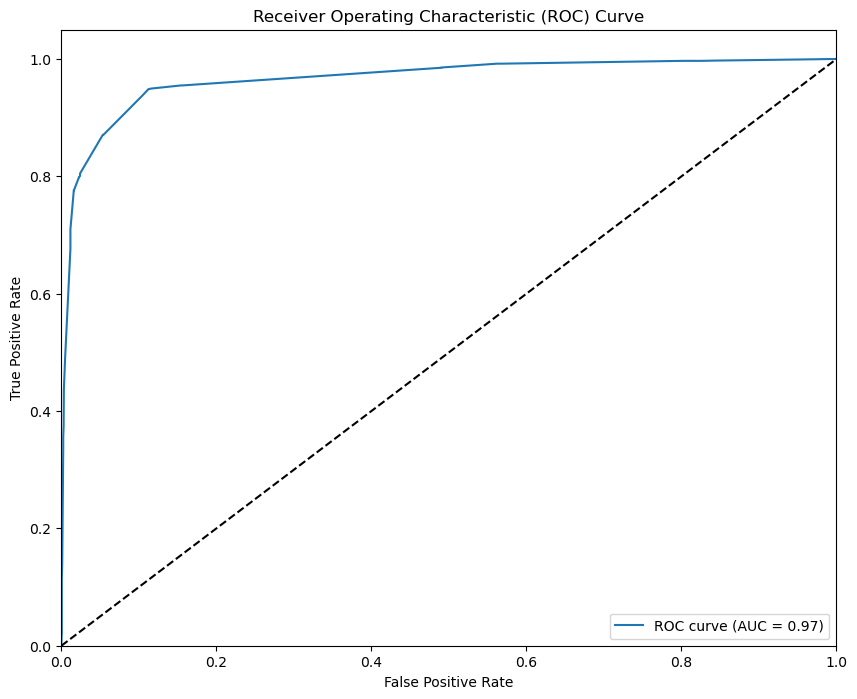

In [100]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the function and pass the actual and predicted probabilities
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [101]:
# Let's create columns with different probability cutoffs
cutoffs = [float(x)/10 for x in range(10)]
for cutoff in cutoffs:
    column_name = 'predicted_' + str(cutoff)
    y_train_pred_final[column_name] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > cutoff else 0)

y_train_pred_final.head()

Converted  Converted_prob                           Prospect ID  predicted  \
0          0        0.012038  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0   
1          1        0.950629  2a272436-5132-4136-86fa-dcc88c88f482          1   
2          0        0.012038  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0   
3          0        0.006922  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0   
4          1        0.995271  3256f628-e534-4826-9d63-4a8b88782852          1   

   predicted_0.0  predicted_0.1  predicted_0.2  predicted_0.3  predicted_0.4  \
0              1              0              0              0              0   
1              1              1              1              1              1   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              1              1              1              1   

   predicted_0.5  predicted_0.6  predicted_0.7  predicted_0.8  predicted_0.9  
0              0              0              0              0              0  
1              1              1              1              1              1  
2              0              0              0              0              0  
3              0              0              0              0              0  
4              1              1              1              1              1

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data_file = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['predicted_' + str(i)])
    total = np.sum(cm)
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_data_file.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_data_file)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.377470     0.000000     1.000000
0.1   0.1  0.908432     0.883333     0.949825
0.2   0.2  0.910738     0.887831     0.948517
0.3   0.3  0.911397     0.894974     0.938482
0.4   0.4  0.917490     0.945767     0.870855
0.5   0.5  0.917984     0.946561     0.870855
0.6   0.6  0.909914     0.976720     0.799738
0.7   0.7  0.909750     0.977249     0.798429
0.8   0.8  0.905468     0.983862     0.776178
0.9   0.9  0.904974     0.984127     0.774433


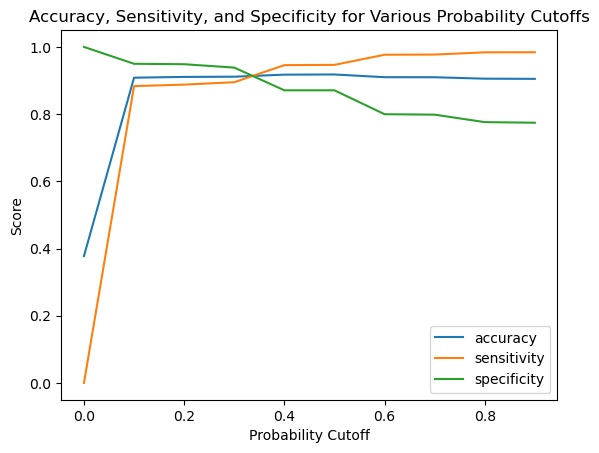

In [103]:
# Let's plot accuracy, sensitivity, and specificity for various probabilities.
cutoff_data_file.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity for Various Probability Cutoffs')
plt.legend()
plt.show()

In [104]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

Converted  Converted_prob                           Prospect ID  predicted  \
0          0        0.012038  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0   
1          1        0.950629  2a272436-5132-4136-86fa-dcc88c88f482          1   
2          0        0.012038  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0   
3          0        0.006922  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0   
4          1        0.995271  3256f628-e534-4826-9d63-4a8b88782852          1   

   predicted_0.0  predicted_0.1  predicted_0.2  predicted_0.3  predicted_0.4  \
0              1              0              0              0              0   
1              1              1              1              1              1   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              1              1              1              1   

   predicted_0.5  predicted_0.6  predicted_0.7  predicted_0.8  predicted_0.9  \
0              0              0              0              0              0   
1              1              1              1              1              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              1              1              1              1              1   

   final_predicted  
0                0  
1                1  
2                0  
3                0  
4                1

### Assigning Lead Score

In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob                           Prospect ID  predicted  \
0          0        0.012038  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0   
1          1        0.950629  2a272436-5132-4136-86fa-dcc88c88f482          1   
2          0        0.012038  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0   
3          0        0.006922  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0   
4          1        0.995271  3256f628-e534-4826-9d63-4a8b88782852          1   

   predicted_0.0  predicted_0.1  predicted_0.2  predicted_0.3  predicted_0.4  \
0              1              0              0              0              0   
1              1              1              1              1              1   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              1              1              1              1   

   predicted_0.5  predicted_0.6  predicted_0.7  predicted_0.8  predicted_0.9  \
0              0              0              0              0              0   
1              1              1              1              1              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              1              1              1              1              1   

   final_predicted  Lead_Score  
0                0           1  
1                1          95  
2                0           1  
3                0           1  
4                1         100

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.910737812911726

In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3356,  424],
       [ 118, 2174]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9485165794066318

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.8878306878306879

**Observation:** We see that our model is performing well. The ROC curve has a value of 0.97 area under the curve, which is very good.

**We have the following values for the Train Data:**
- Accuracy : 87.99%
- Sensitivity : 95.28%
- Specificity : 83.57%

### Making predictions on the test set

In [111]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

const  Lead Source_Welingak Website  Last Activity_Email Bounced  \
3394    1.0                             0                            0   
358     1.0                             0                            0   
6670    1.0                             0                            0   
3059    1.0                             0                            0   
5633    1.0                             0                            0   

      Last Activity_SMS Sent  What is your current occupation_Student  \
3394                       0                                        0   
358                        0                                        0   
6670                       0                                        0   
3059                       0                                        0   
5633                       1                                        0   

      What is your current occupation_Unemployed  \
3394                                           1   
358                                            1   
6670                                           1   
3059                                           1   
5633                                           0   

      What is your current occupation_Working Professional  Tags_Busy  \
3394                                                  0             0   
358                                                   0             0   
6670                                                  0             0   
3059                                                  0             0   
5633                                                  1             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_NotSpecified  \
3394                        0                  0                  0   
358                         0                  0                  0   
6670                        0                  0                  0   
3059                        0                  0                  0   
5633                        0                  0                  0   

      Tags_Ringing  Tags_Will revert after reading the email  
3394             0                                         0  
358              0                                         1  
6670             0                                         0  
3059             1                                         0  
5633             0                                         1

In [112]:
X_train.columns

Index(['const', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NotSpecified',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [113]:
X_test = X_test[X_train.drop('const',1).columns]
X_test.head()

C:\Users\VCSPI0048\AppData\Local\Temp\ipykernel_23052\2464963827.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test[X_train.drop('const',1).columns]


Lead Source_Welingak Website  Last Activity_Email Bounced  \
4891                             0                            0   
3001                             0                            0   
3028                             0                            0   
3957                             0                            0   
6360                             0                            0   

      Last Activity_SMS Sent  What is your current occupation_Student  \
4891                       0                                        0   
3001                       1                                        0   
3028                       1                                        1   
3957                       0                                        0   
6360                       1                                        0   

      What is your current occupation_Unemployed  \
4891                                           1   
3001                                           1   
3028                                           0   
3957                                           0   
6360                                           1   

      What is your current occupation_Working Professional  Tags_Busy  \
4891                                                  0             0   
3001                                                  0             1   
3028                                                  0             0   
3957                                                  0             0   
6360                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_NotSpecified  \
4891                        0                  0                  0   
3001                        0                  0                  0   
3028                        0                  0                  0   
3957                        0                  0                  1   
6360                        0                  0                  0   

      Tags_Ringing  Tags_Will revert after reading the email  
4891             0                                         1  
3001             0                                         0  
3028             0                                         1  
3957             0                                         0  
6360             1                                         0

In [115]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logit_result.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

0
4891  0.950629
3001  0.780964
3028  0.991008
3957  0.069877
6360  0.057312

In [117]:
# Converting y_test to dataframe
y_test_data_file = pd.DataFrame(y_test)
# Putting CustID to index
y_test_data_file['Prospect ID'] = y_test_data_file.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_data_file.reset_index(drop=True, inplace=True)
# Appending y_test_data_file and y_pred_1
y_pred_final = pd.concat([y_test_data_file, y_pred_1],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4891  0.950629
1          1         3001  0.780964
2          1         3028  0.991008
3          1         3957  0.069877
4          1         6360  0.057312

In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         4891          1        0.950629
1         3001          1        0.780964
2         3028          1        0.991008
3         3957          1        0.069877
4         6360          1        0.057312

In [119]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         4891          1        0.950629                1
1         3001          1        0.780964                1
2         3028          1        0.991008                1
3         3957          1        0.069877                0
4         6360          1        0.057312                0

In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9004994237418363

## Precision and Recall

In [121]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  195],
       [  64,  936]], dtype=int64)

In [122]:
#  Precision
# TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.908098271155596

In [123]:
#  Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8708551483420593

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.936

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8783530879600748

**Observation:** 
After running the model on test data we get the following figues,

- Accuracy : 87.78%
- Sensitivity : 95.30%
- Specificity : 83.09%
#### Comparison of the values of test and train data.
 **Train data:**
- Accuracy : 87.99%
- Sensitivity : 95.28%
- Specificity : 83.57%

 **Test data:**
- Accuracy : 87.78%
- Sensitivity : 95.30%
- Specificity : 83.09%
##### It was found that variables that mattered the most for getting potential customers are :
- Tags_Will revert after reading the email
- Tags_NotSpecified
- Lead Origin_Lead Add Form
- Last Activity_SMS Sent
- Tags_Ringing
- Total Time Spent on Website
- Last Activity_Email Opened
- Lead Source_Welingak Website
- Lead Source_Olark Chat
- Tags_Closed by Horizzon
- Tags_Busy
- Tags_Lost to EINS
### **Conclusion** 
The Model has predicted the Lead Conversion Rate very well and based on this model we should be able to give confidence to the CEO about making good calls.

- **Name:-** Harsh Pandya
- **Batch:-** DS40 upGrad & IIITB | Data Science Program - November 2022
- **Date:-** 20-05-2023